<a href="https://colab.research.google.com/github/Tommy4STAT/CUHK-STAT3009/blob/main/3011project_arma_garch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dependancies

In [ ]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt
import pandas.core.indexes as pd_indexes
%matplotlib inline


## Load dataset

In [2]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('/content/pickled_ten_year_filtered_lead_para.pkl')

In [3]:
df_stocks

close     adj close  \
2007-01-01  12469.971875  12469.971875   
2007-01-02  12472.245703  12472.245703   
2007-01-03  12474.519531  12474.519531   
2007-01-04  12480.690430  12480.690430   
2007-01-05  12398.009766  12398.009766   
...                  ...           ...   
2016-12-27  19945.039062  19945.039062   
2016-12-28  19833.679688  19833.679688   
2016-12-29  19819.779297  19819.779297   
2016-12-30  19762.599609  19762.599609   
2016-12-31  19762.599609  19762.599609   

                                                     articles  
2007-01-01  . What Sticks from '06. Somalia Orders Islamis...  
2007-01-02  . Heart Health: Vitamin Does Not Prevent Death...  
2007-01-03  . Google Answer to Filling Jobs Is an Algorith...  
2007-01-04  . Helping Make the Shift From Combat to Commer...  
2007-01-05  . Rise in Ethanol Raises Concerns About Corn a...  
...                                                       ...  
2016-12-27  . Should the U.S. Embassy Be Moved From Tel Av...  
2016-12-28  . When Finding the Right Lawyer Seems Daunting...  
2016-12-29  . Does Empathy Guide or Hinder Moral Action?. ...  
2016-12-30  . Shielding Seized Assets From Corruption’s Cl...  
2016-12-31  Terrorist Attack at Nightclub in Istanbul Kill...  

[3653 rows x 3 columns]

In [4]:
df_stocks.head()

close     adj close  \
2007-01-01  12469.971875  12469.971875   
2007-01-02  12472.245703  12472.245703   
2007-01-03  12474.519531  12474.519531   
2007-01-04  12480.690430  12480.690430   
2007-01-05  12398.009766  12398.009766   

                                                     articles  
2007-01-01  . What Sticks from '06. Somalia Orders Islamis...  
2007-01-02  . Heart Health: Vitamin Does Not Prevent Death...  
2007-01-03  . Google Answer to Filling Jobs Is an Algorith...  
2007-01-04  . Helping Make the Shift From Combat to Commer...  
2007-01-05  . Rise in Ethanol Raises Concerns About Corn a...

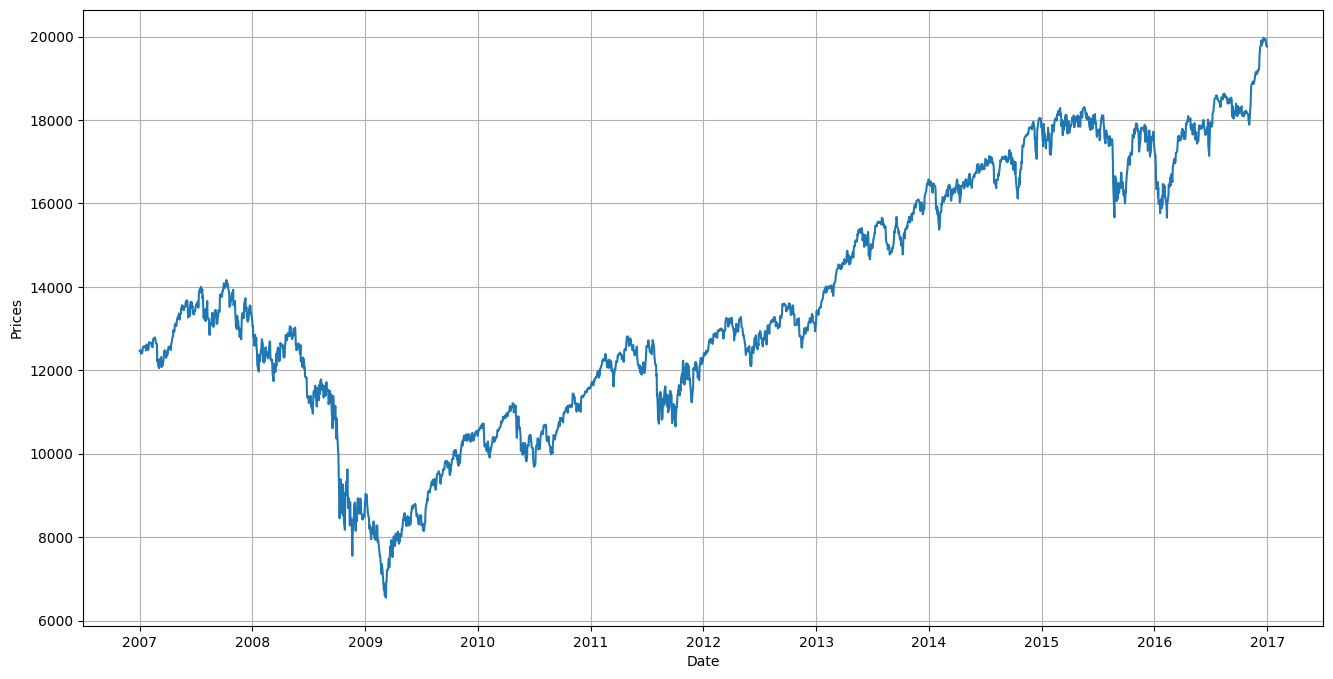

In [5]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.plotting import lag_plot
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

plt.figure(figsize=(16, 8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Prices')
plt.plot(df_stocks.index, df_stocks['close'])
plt.show()

In [6]:
print(df_stocks.columns)

Index(['close', 'adj close', 'articles'], dtype='object')


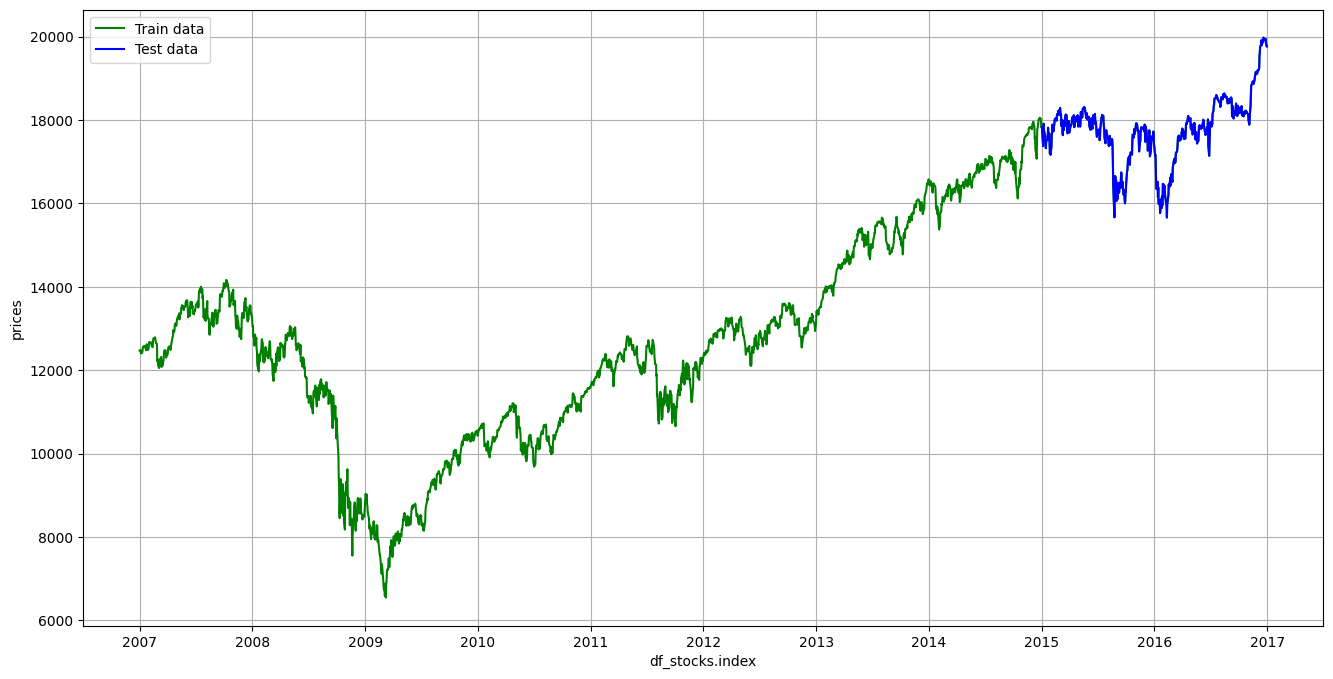

In [7]:
train_data, test_data = df_stocks[0:-730], df_stocks[-730:]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('df_stocks.index')
plt.ylabel('prices')
plt.plot(df_stocks['close'], 'green', label='Train data')
plt.plot(test_data['close'], 'blue', label='Test data')
plt.legend()

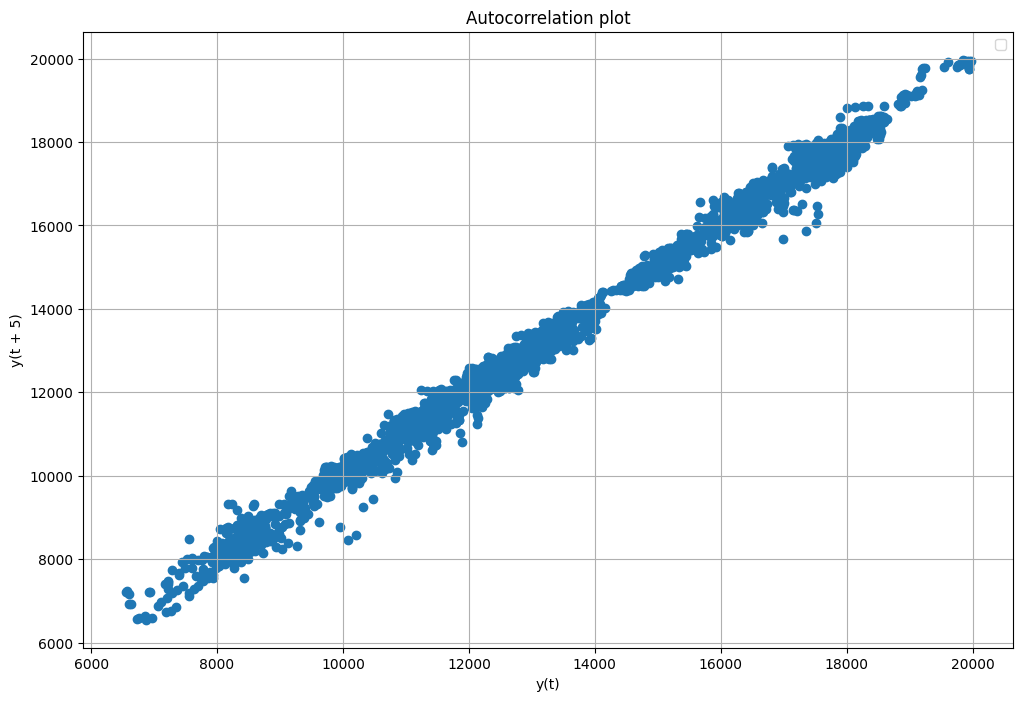

In [8]:
##The charts above shows a high correlation between y(t) and y(t+5)
plt.figure(figsize=(12,8))
lag_plot(df_stocks['close'], lag=5)
plt.title('Autocorrelation plot')
plt.grid(True)
plt.legend()

In [9]:
##Checking correlation by calculating covariance
values = DataFrame(df_stocks['close'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)

             t       t+1       t+5      t+10      t+30
t     1.000000  0.997459  0.994633  0.983796  0.999374
t+1   0.997459  1.000000  0.996841  0.985884  0.996857
t+5   0.994633  0.996841  1.000000  0.988509  0.994134
t+10  0.983796  0.985884  0.988509  1.000000  0.983246
t+30  0.999374  0.996857  0.994134  0.983246  1.000000


MSE: 14302.988966765459
MAE: 80.6685613551485
RMSE: 119.59510427590862


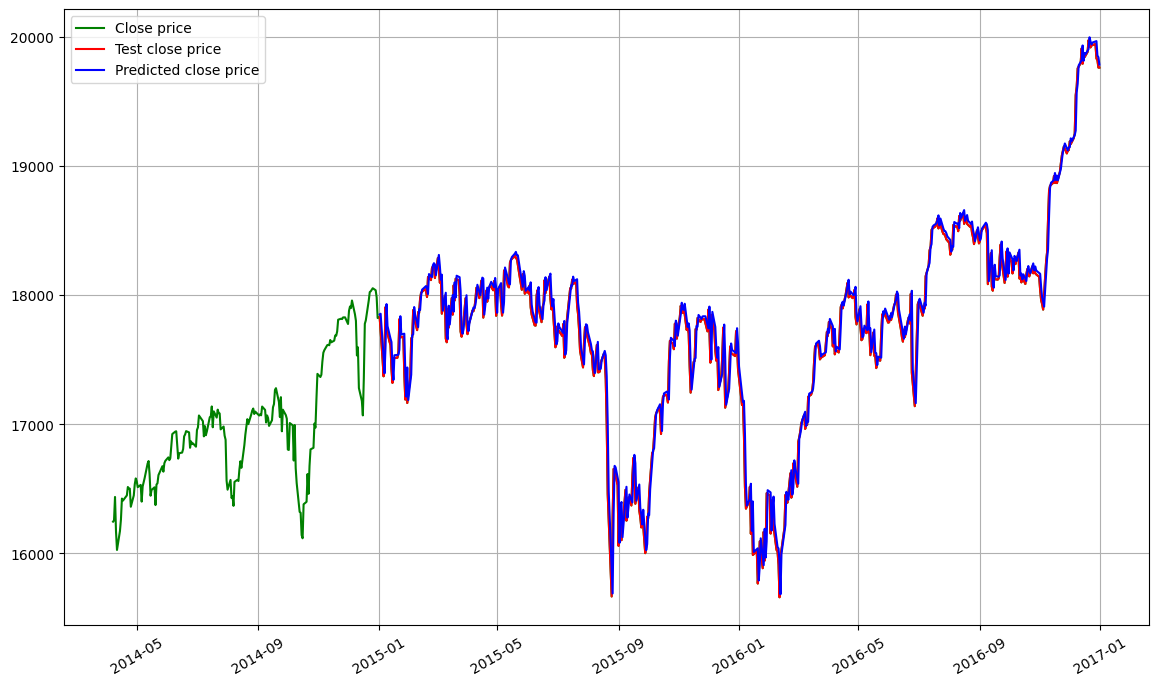

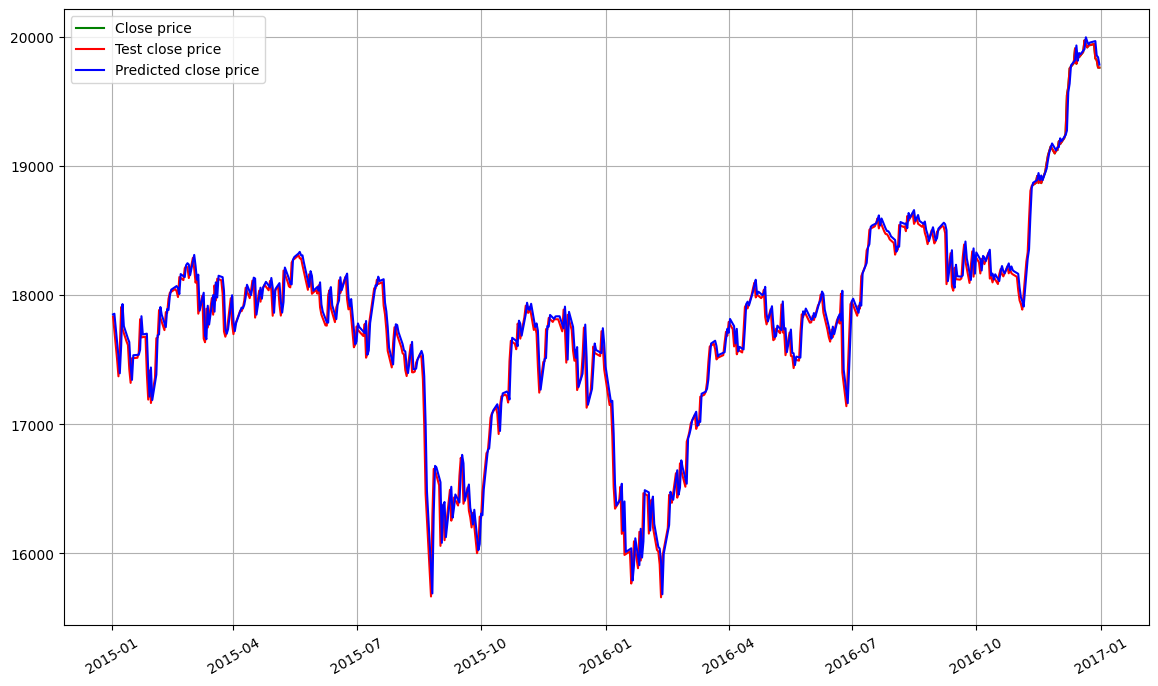

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.ar_model import AutoReg

train_ar = train_data['close']
test_ar = test_data['close']
lags = 1

model = AutoReg(train_ar, lags=lags)
model_fit = model.fit()
window = lags
coef = model_fit.params
window = 1
history = train_ar[len(train_ar)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_ar[t]
    predictions.append(yhat+22)
    history.append(obs)

plt.figure(figsize=(14,8))
plt.plot(df_stocks.index[-1000:], df_stocks['close'].tail(1000), color='green', label='Close price')
plt.plot(test_data.index, test_data['close'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

plt.figure(figsize=(14,8))
plt.plot(df_stocks.index[-50:], df_stocks['close'].tail(50), color='green', label='Close price')
plt.plot(test_data.index, test_data['close'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

print('MSE: '+str(mean_squared_error(test_data['close'], predictions)))
print('MAE: '+str(mean_absolute_error(test_data['close'], predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['close'], predictions))))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


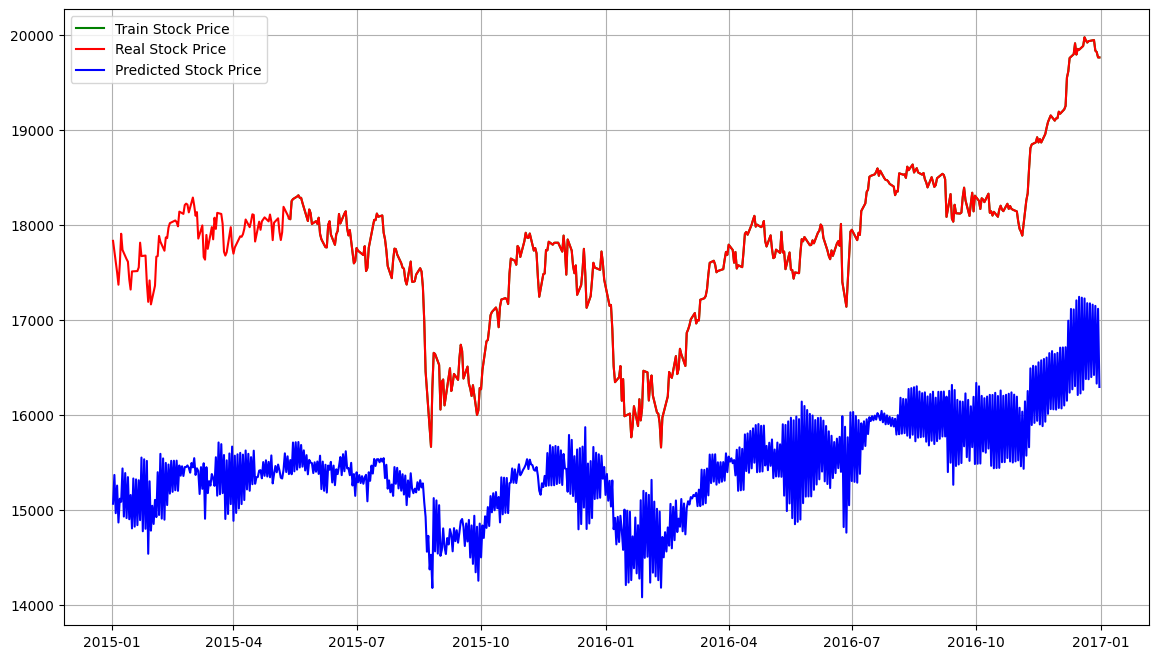

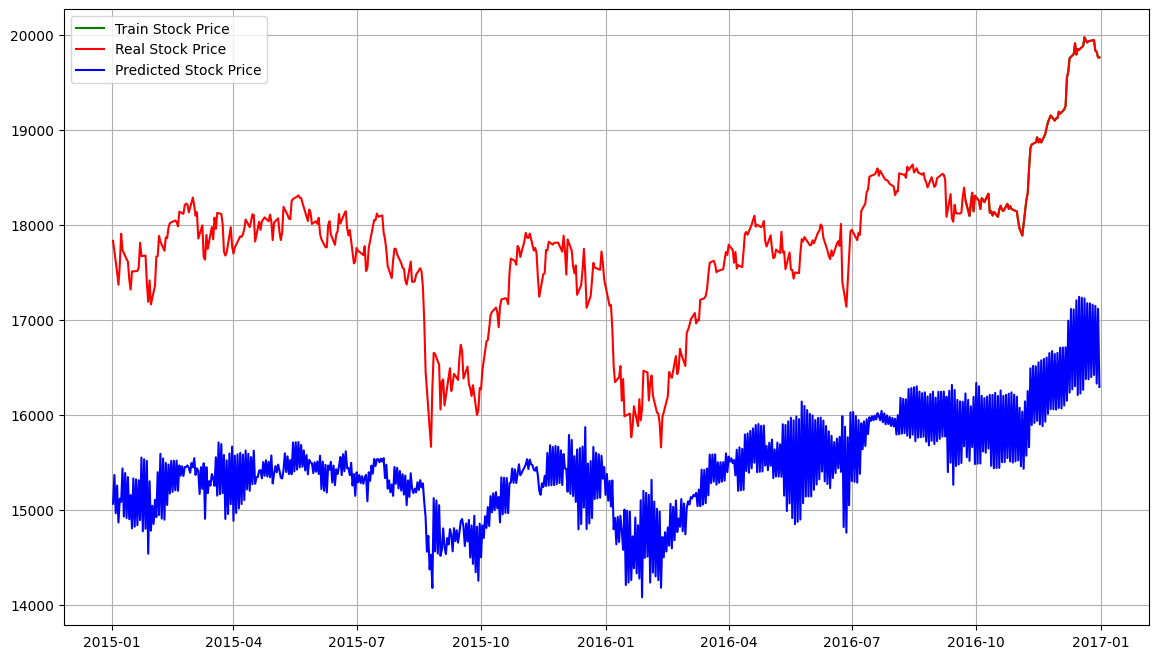

MSE: 5481923.493040917
MAE: 2296.8667367013827
RMSE: 2341.350783851262


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA

train_ma = train_data['close']
test_ma = test_data['close']
history = [x for x in train_ma]
y = test_ma
predictions = []

model = ARIMA(history, order=(0, 0, 1))
model_fit = model.fit()

for i in range(len(y)):
    yhat = model_fit.forecast()[0]
    predictions.append(yhat + 50)
    obs = y[i]
    history.append(obs)
    model = ARIMA(history, order=(0, 0, 1))  # Reinitialize the model with updated history
    model_fit = model.fit()

plt.figure(figsize=(14, 8))
plt.plot(df_stocks.index[-600:], df_stocks['close'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, y, color='red', label='Real Stock Price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(df_stocks.index[-100:], df_stocks['close'].tail(100), color='green', label='Train Stock Price')
plt.plot(test_data.index, y, color='red', label='Real Stock Price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

print('MSE:', mean_squared_error(y, predictions))
print('MAE:', mean_absolute_error(y, predictions))
print('RMSE:', sqrt(mean_squared_error(y, predictions)))

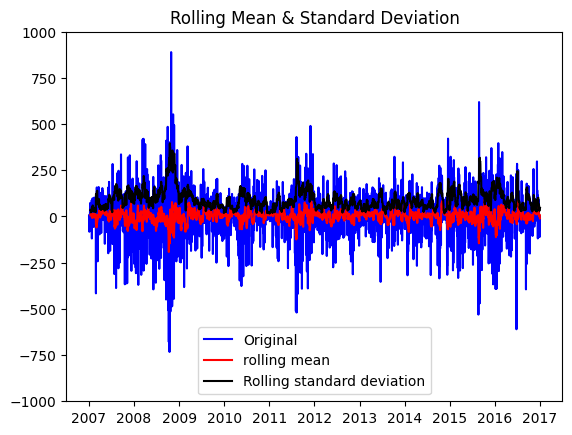

Results of Dickey-Fuller Test:
Test Statistic                -1.142728e+01
p-value                        6.647799e-21
#Lags Used                     2.700000e+01
Number of Observations Used    3.624000e+03
Critical value (1%)           -3.432156e+00
Critical value (5%)           -2.862338e+00
Critical value (10%)          -2.567195e+00
dtype: float64


In [11]:
def test_stationarity(timeseries):
    rolmean = pd.Series.rolling(timeseries,window=12).mean()
    rolstd = pd.Series.rolling(timeseries, window=12).std()
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    plt.ylim([-1000,1000])
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)
ts_log = df_stocks['close']
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

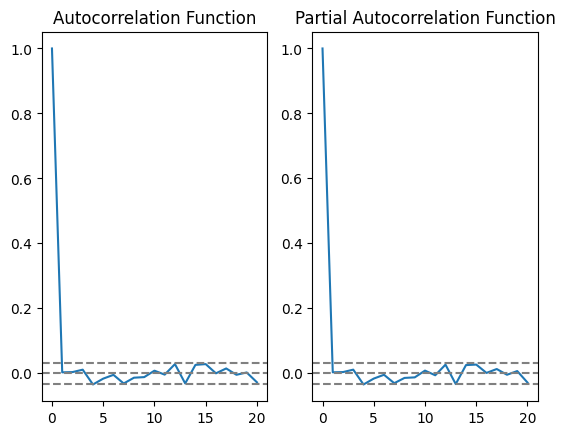

In [12]:
##figuring out arma(p,q)
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

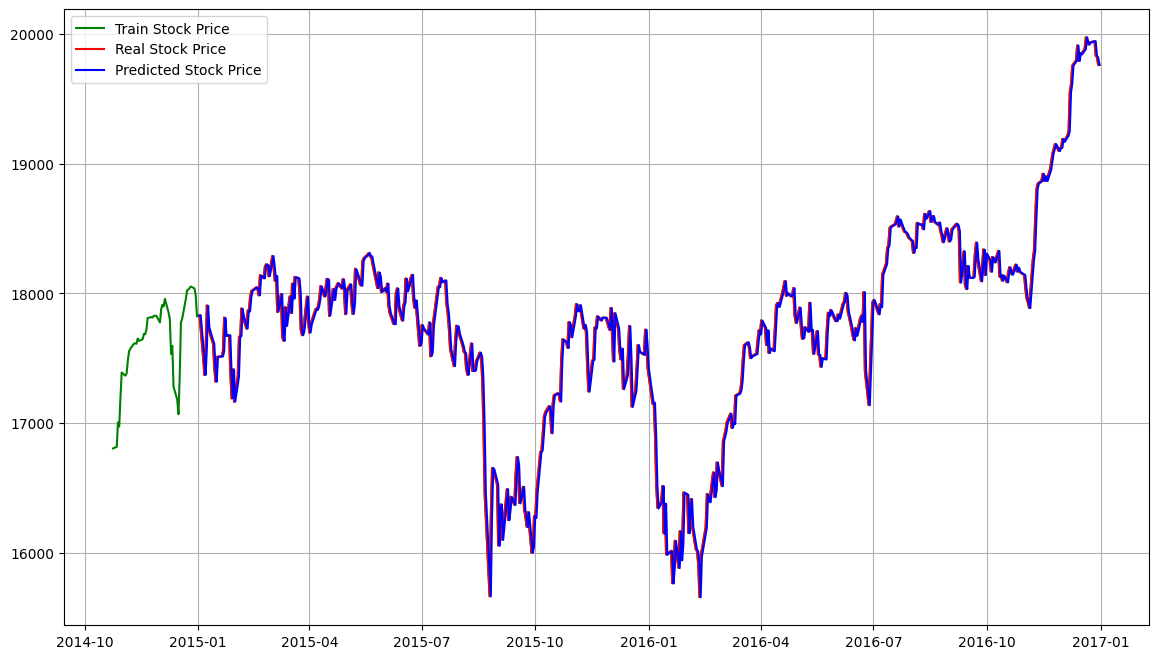

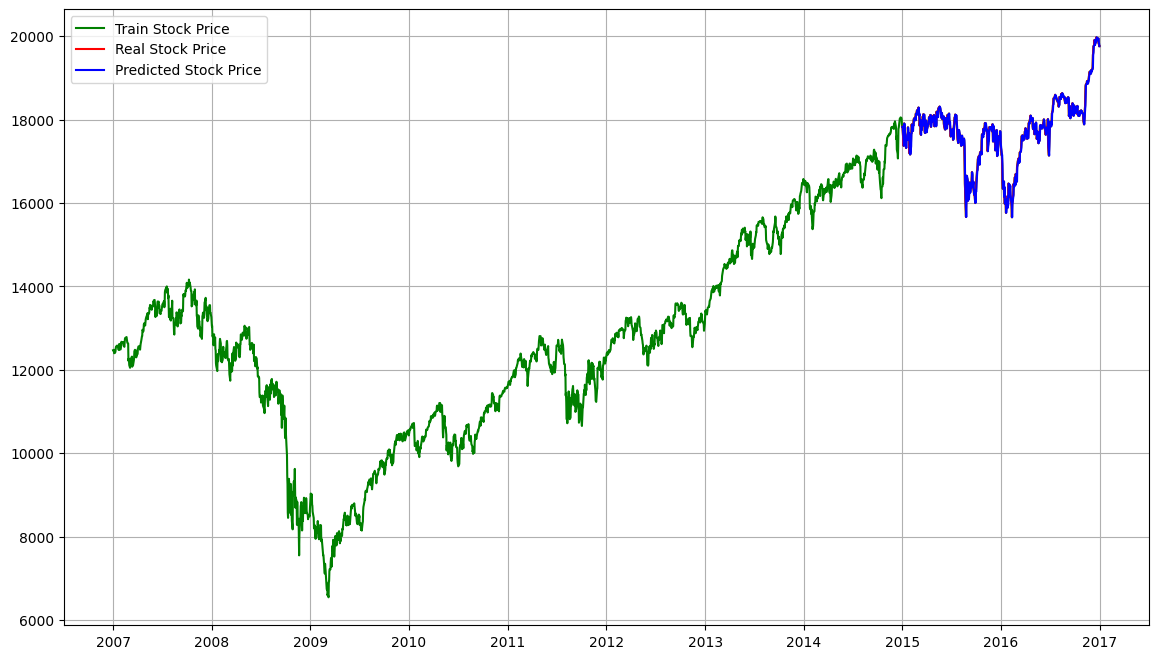

MSE: 13922.837956601239
MAE: 77.86054119183864
RMSE: 117.99507598455641


In [13]:
##ARMA process with data after difference:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Assuming train_data and test_data are the DataFrames containing the stock prices
train_arma = train_data['close']
test_arma = test_data['close']
history = [x for x in train_arma]
y = test_arma
predictions = []
model = sm.tsa.arima.ARIMA(history, order=(1, 0, 1))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
for i in range(1, len(y)):
    model = sm.tsa.arima.ARIMA(history, order=(1, 0, 1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = y[i]
    history.append(obs)

plt.figure(figsize=(14, 8))
plt.plot(df_stocks.index[-800:], df_stocks['close'].tail(800), color='green', label='Train Stock Price')
plt.plot(test_data.index, y, color='red', label='Real Stock Price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 8))
plt.plot(df_stocks.index, df_stocks['close'], color='green', label='Train Stock Price')
plt.plot(test_data.index, y, color='red', label='Real Stock Price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

print('MSE: ' + str(mean_squared_error(y, predictions)))
print('MAE: ' + str(mean_absolute_error(y, predictions)))
print('RMSE: ' + str(sqrt(mean_squared_error(y, predictions))))

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Figure size 1850x1050 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

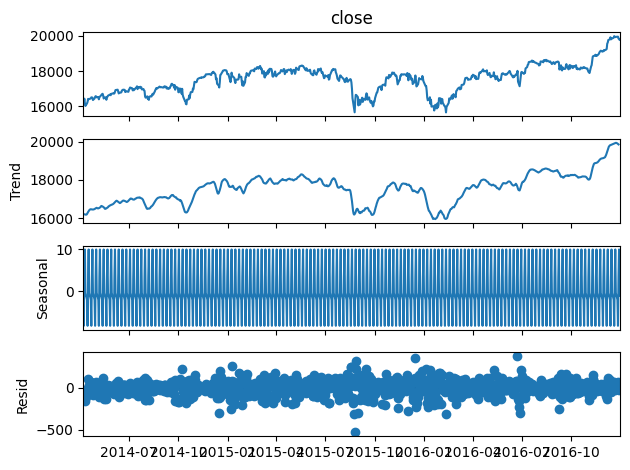

In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df_stocks_arima = df_stocks['close']
fig = plt.figure(figsize=(18.5, 10.5))
decomposition = seasonal_decompose(df_stocks_arima[-1000:], model='additive')

plt.figure(figsize=(20, 10))
fig = decomposition.plot()
plt.show()

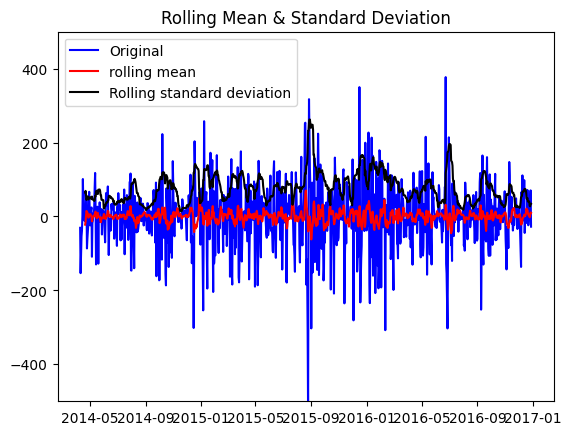

Results of Dickey-Fuller Test:
Test Statistic                -1.096229e+01
p-value                        8.268263e-20
#Lags Used                     2.200000e+01
Number of Observations Used    9.710000e+02
Critical value (1%)           -3.437102e+00
Critical value (5%)           -2.864521e+00
Critical value (10%)          -2.568357e+00
dtype: float64


In [17]:
def test_stationarity(timeseries):
    rolmean = pd.Series.rolling(timeseries,window=12).mean()
    rolstd = pd.Series.rolling(timeseries, window=12).std()
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    plt.ylim([-500,500])
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)
residual = decomposition.resid
residual.dropna(inplace=True)
test_stationarity(residual)

##As shown in the charts, mean and variance have a lower volatility. And Dickey Fuller test showed the data is stationary in 90% confidence level.(Critical value>-2.96053)

In [18]:
trend = decomposition.trend
sea=decomposition.seasonal
train_trend, test_trend = trend[0:-730], trend[-730:]
train_sea, test_sea = sea[0:-730], sea[-730:]

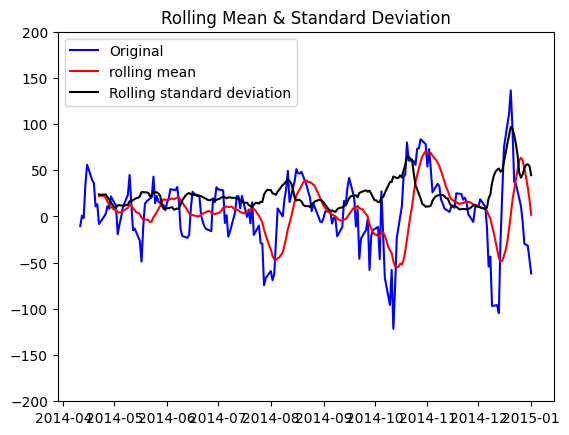

Results of Dickey-Fuller Test:
Test Statistic                  -3.868801
p-value                          0.002277
#Lags Used                      14.000000
Number of Observations Used    251.000000
Critical value (1%)             -3.456674
Critical value (5%)             -2.873125
Critical value (10%)            -2.572944
dtype: float64


In [19]:
def test_stationarity(timeseries):
    rolmean = pd.Series.rolling(timeseries,window=12).mean()
    rolstd = pd.Series.rolling(timeseries, window=12).std()
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    plt.ylim([-200,200])
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)
ts_log = train_trend
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

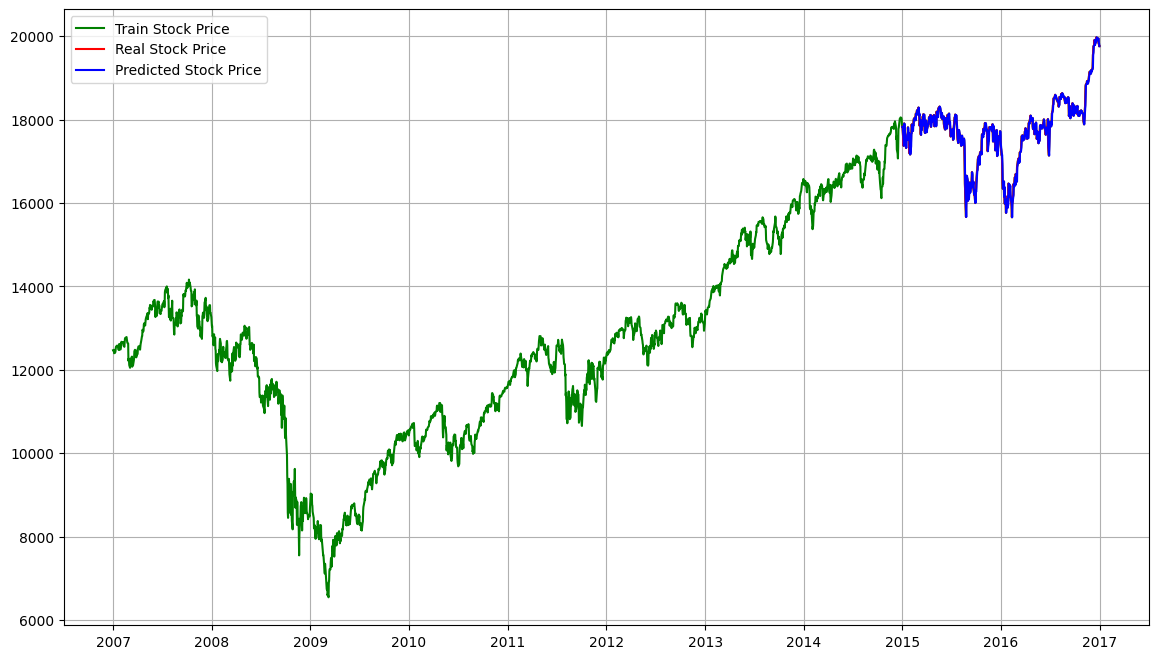

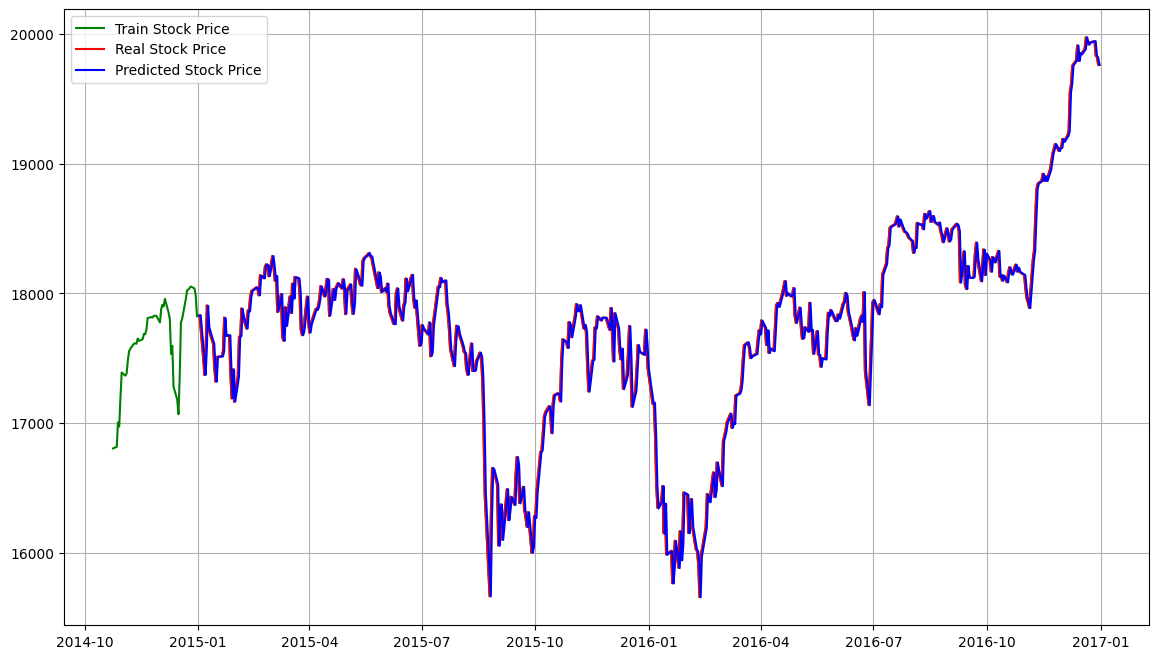

MSE: 13922.837956601239
MAE: 77.86054119183864
RMSE: 117.99507598455641


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Assuming train_data and test_data are the DataFrames containing the stock prices
train_arma = train_data['close']
test_arma = test_data['close']
history = [x for x in train_arma]
y = test_arma
predictions = []
model = sm.tsa.arima.ARIMA(history, order=(1, 0, 1))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
for i in range(1, len(y)):
    model = sm.tsa.arima.ARIMA(history, order=(1, 0, 1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = y[i]
    history.append(obs)
plt.figure(figsize=(14, 8))
plt.plot(df_stocks.index, df_stocks['close'], color='green', label='Train Stock Price')
plt.plot(test_data.index, y, color='red', label='Real Stock Price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 8))
plt.plot(df_stocks.index[-800:], df_stocks['close'].tail(800), color='green', label='Train Stock Price')
plt.plot(test_data.index, y, color='red', label='Real Stock Price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
print('MSE: ' + str(mean_squared_error(y, predictions)))
print('MAE: ' + str(mean_absolute_error(y, predictions)))
print('RMSE: ' + str(sqrt(mean_squared_error(y, predictions))))

In [21]:
returns = pd.DataFrame(np.log(train_data['close']).diff().dropna())
returns.rename(columns={'prices':'Log Return Rate'}, inplace=True)

from statsmodels.tsa.stattools import adfuller
returns_array_like = [x for l in returns.values for x in l]
_, pvalue, *_ = adfuller(returns_array_like)
print ('pvalue :',pvalue)

pvalue : 3.3177147920548765e-18


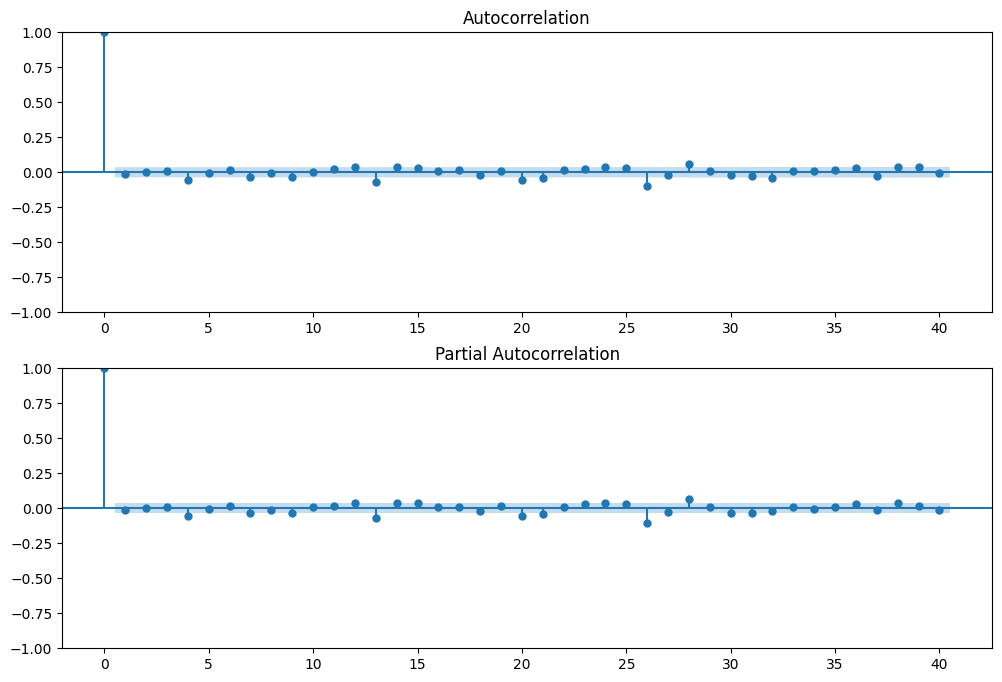

In [22]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(returns.values, lags=40, alpha=0.05, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(returns.values, lags=40, alpha=0.05, ax=ax2)

In [23]:
import  statsmodels.tsa.stattools as sts
resid = sts.arma_order_select_ic(returns, max_ar=4, max_ma=4,ic=['aic','bic','hqic'], trend='n', fit_kw=dict(method='css'))
print ('AIC-order :{}'.format(resid.aic_min_order))
print ('BIC-order :{}'.format(resid.bic_min_order))
print ('HQIC-order :{}'.format(resid.hqic_min_order))

AIC-order :(0, 0)
BIC-order :(0, 0)
HQIC-order :(0, 0)


In [26]:
import statsmodels.api as sm

arma_mod01 = sm.tsa.ARIMA(returns, order=(0, 0, 0)).fit()
print (arma_mod01.summary())
print ('-------------------------------------')
print (arma_mod01.params)

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2922
Model:                          ARIMA   Log Likelihood                9406.720
Date:                Thu, 21 Mar 2024   AIC                         -18809.440
Time:                        13:01:34   BIC                         -18797.480
Sample:                    01-02-2007   HQIC                        -18805.133
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.656      0.512      -0.000       0.000
sigma2      9.351e-05   8.76e-07    106.738      0.000    9.18e-05    9.52e-05
Ljung-Box (L1) (Q):                   0.67   Jarque-

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diagnostic

# Fit ARMA model
arma_mod01 = sm.tsa.ARIMA(returns, order=(0, 0, 0)).fit()

# Calculate residuals
residuals = arma_mod01.resid

# Perform ARCH test for residual heteroscedasticity
lm, lmpvalue, fval, fpvalue = diagnostic.het_arch(residuals)
print(fpvalue)

8.492886798052888e-173


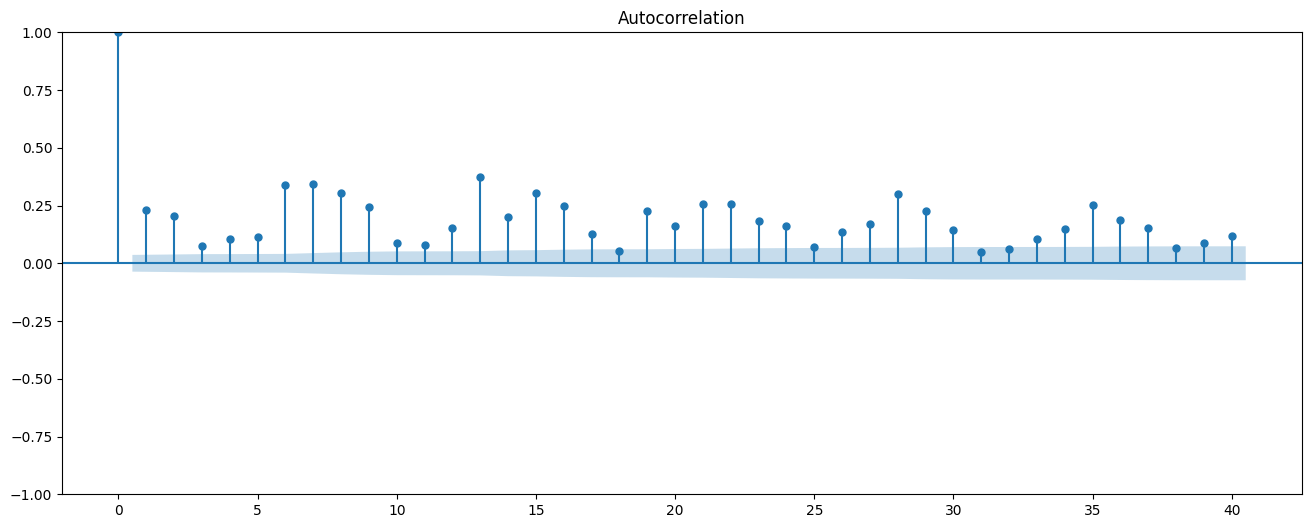

In [ ]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

# Fit ARMA model
arma_mod01 = sm.tsa.ARIMA(returns, order=(0, 0, 0)).fit()

# Calculate residuals
residuals = arma_mod01.resid

# Calculate squared residuals
residuals_squared = residuals**2

# Plot ACF of squared residuals
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(111)
fig = tsaplots.plot_acf(residuals_squared, lags=40, ax=ax1)

# Display the plot
plt.show()

In [ ]:
from statsmodels.stats.stattools import jarque_bera
_, jbpv, *_ = jarque_bera(returns.values)
print ('pvalue-->',jbpv)

pvalue--> [0.]


In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 6.2 MB/s eta 0:00:00


In [ ]:
from arch import arch_model
from arch.univariate import ZeroMean, GARCH, StudentsT, ConstantMean
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
print (res.summary())
print (' ')
print ('The estimated parameters: ')
print ('----------------------------------------')
print (res.params)

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                8392.84
Distribution:      Standardized Student's t   AIC:                          -16775.7
Method:                  Maximum Likelihood   BIC:                          -16745.8
                                              No. Observations:                 2922
Date:                      Wed, Mar 20 2024   Df Residuals:                     2921
Time:                              02:23:29   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.36e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [ ]:
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]
print(mu, theta, omega, alpha, beta)

0.00011733440726215206 9.35136720017218e-05 1.3353022711043162e-06 0.5110464103614384 0.43030954631019996


In [ ]:
sigma_t = res.conditional_volatility.iloc[-1]
sigma_forecast = np.sqrt(omega + alpha * res.resid.iloc[-1] ** 2 + beta * res.conditional_volatility.iloc[-1] ** 2)
epsilon_t = sigma_t * np.random.standard_normal()
epsilon_forecast = sigma_forecast * np.random.standard_normal()
returns_forecast = mu + epsilon_forecast + theta * epsilon_t
returns_forecast

0.0041559183810460166

In [ ]:
def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool

train_returns = pd.DataFrame(np.log(test_data['close']).diff().dropna())
train_returns.rename(columns={'close':'Log Return Rate'}, inplace=True)

<Figure size 1400x800 with 0 Axes>

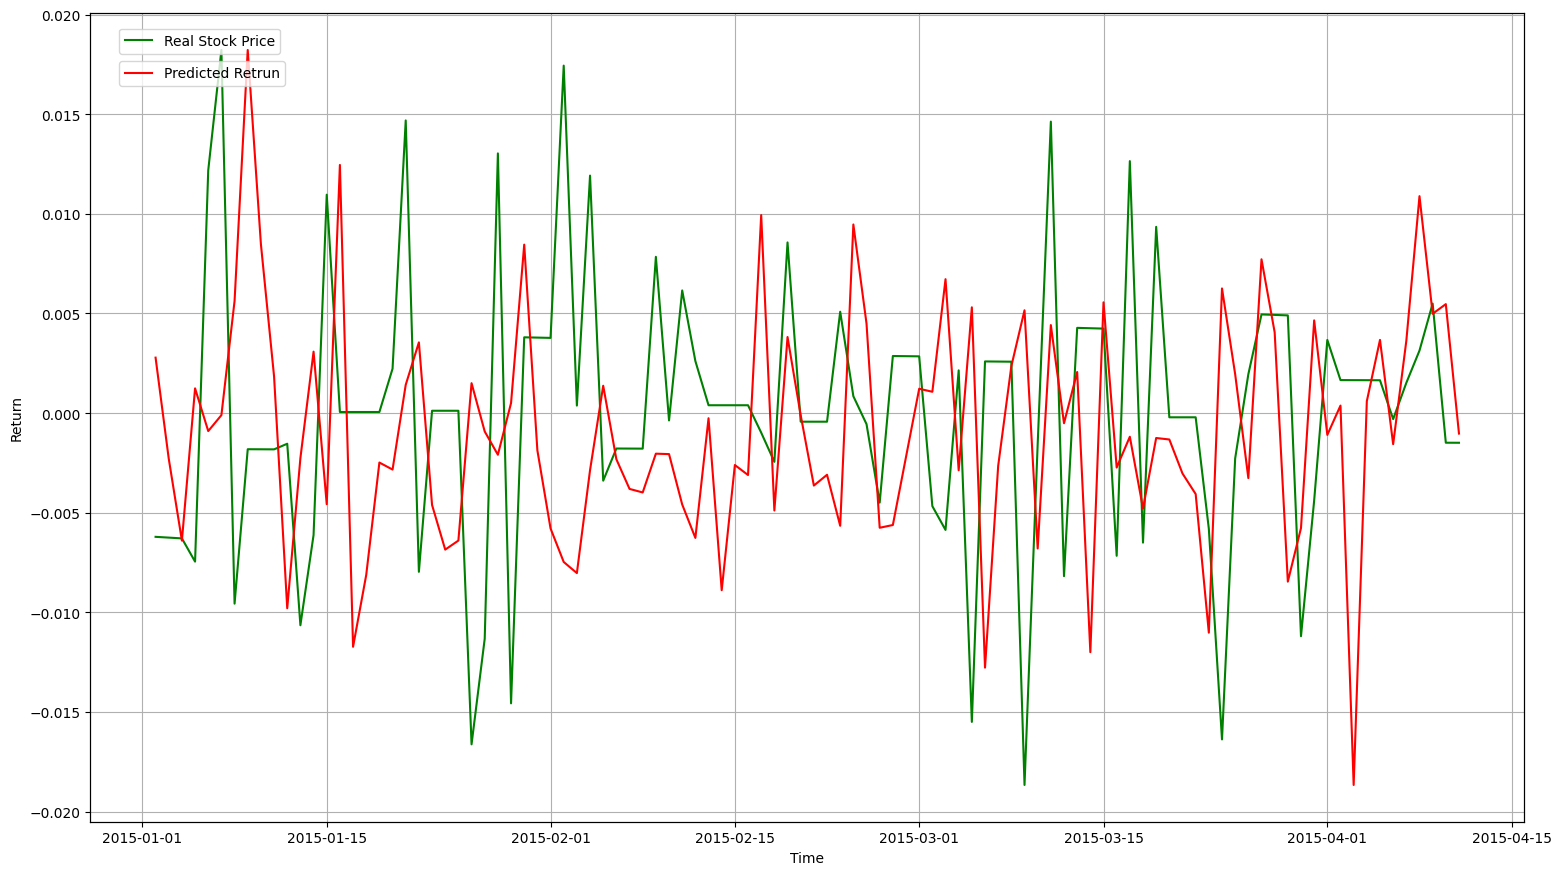

In [ ]:
##Prediction results of the ARIMA-GARCH model
plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
ax.plot(df_stocks.index[-730:-630], train_returns['Log Return Rate'][:100], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(df_stocks.index[-730:-630],returns_predict(100), color='red',label = 'Predicted Retrun')
ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])
ax2.legend(loc = (0.02, 0.91))

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.36e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<Figure size 1400x800 with 0 Axes>

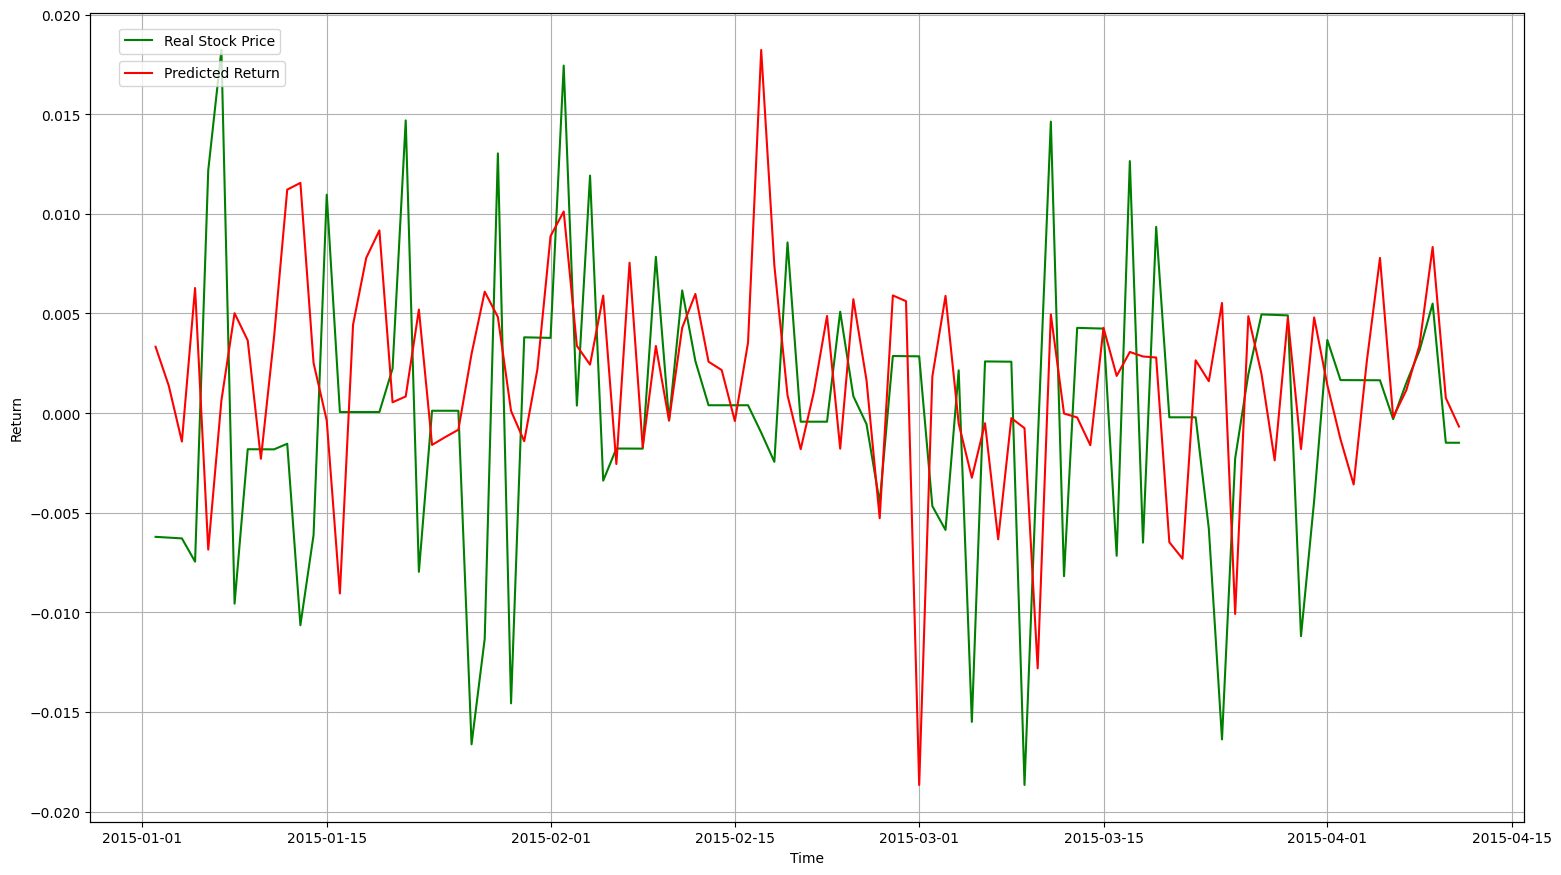

In [ ]:
##Prediction results of General Motors Company using the ARIMA-GARCH model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch.univariate import GARCH, StudentsT

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

train_data, test_data = df_stocks[0:-730], df_stocks[-730:]
returns = pd.DataFrame(np.log(train_data['close']).diff().dropna())
returns.rename(columns={'close': 'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARIMA(returns, order=(1, 0, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1, 0, 1)
arch_mod.distribution = StudentsT()
res = arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]


def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool


train_returns = pd.DataFrame(np.log(test_data['close']).diff().dropna())
train_returns.rename(columns={'close': 'Log Return Rate'}, inplace=True)

plt.figure(figsize=(14, 8))
fig, ax = plt.subplots(figsize=(18.5, 10.5))

ax.plot(df_stocks.index[-730:-630], train_returns['Log Return Rate'][:100], color='green', label='Real Stock Price')

ax2 = ax.twinx()
ax2.plot(df_stocks.index[-730:-630], returns_predict(100), color='red', label='Predicted Return')

ax.legend(loc=(0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])
ax2.legend(loc=(0.02, 0.91))

plt.show()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.36e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<Figure size 1400x800 with 0 Axes>

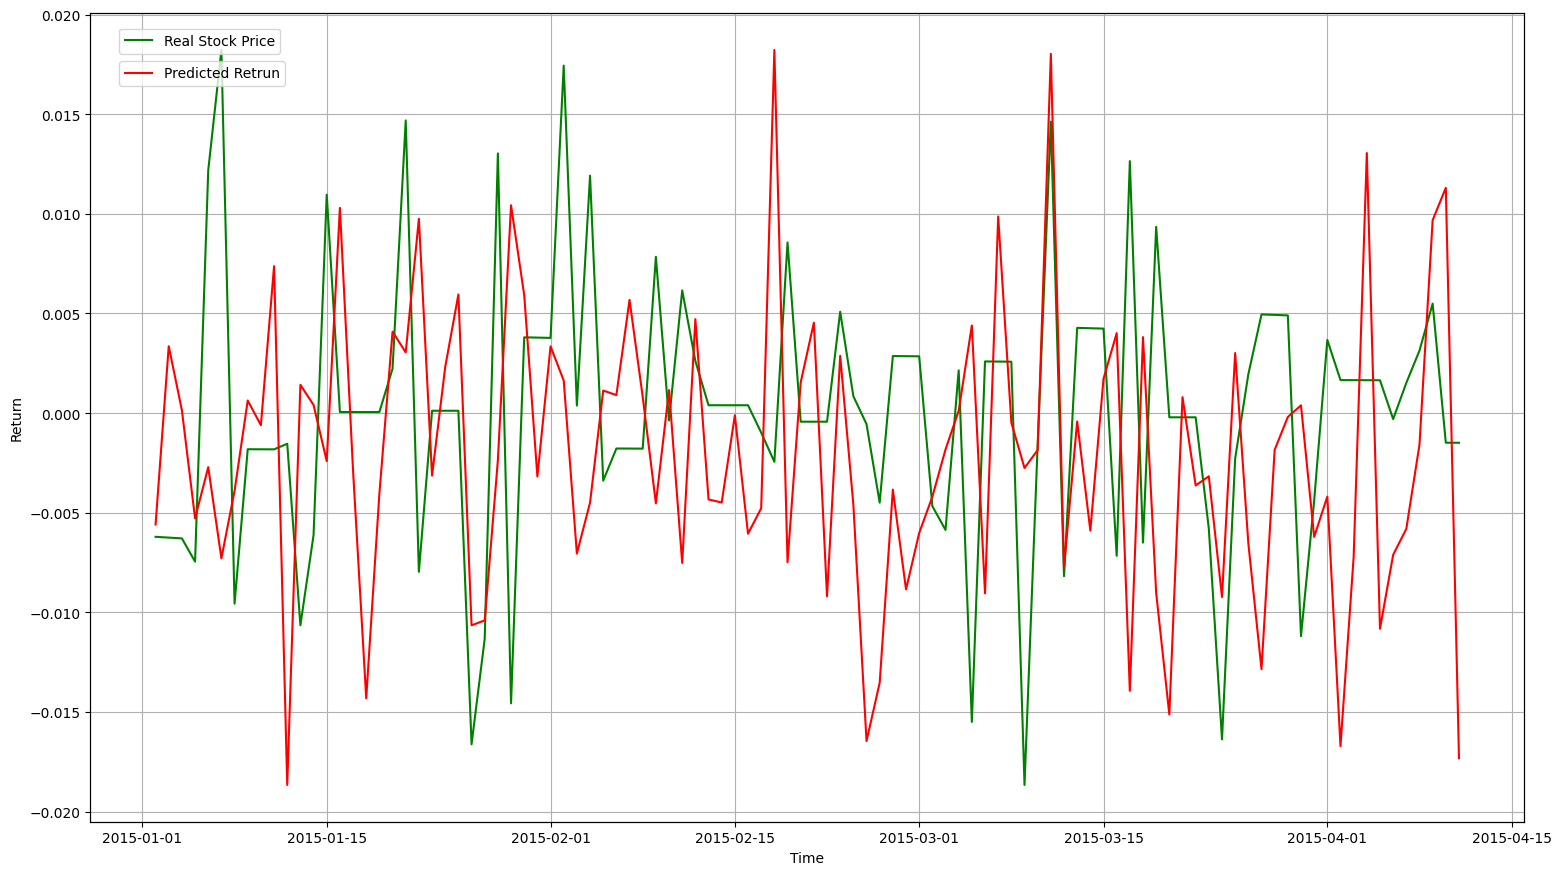

In [ ]:
##Prediction results of IBM using the ARIMA-GARCH model
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

train_data, test_data = df_stocks[0:-730], df_stocks[-730:]
returns = pd.DataFrame(np.log(train_data['close']).diff().dropna())
returns.rename(columns={'close':'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARIMA(returns, order=(1, 0, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]
def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool
train_returns = pd.DataFrame(np.log(test_data['close']).diff().dropna())
train_returns.rename(columns={'close':'Log Return Rate'}, inplace=True)
plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
ax.plot(df_stocks.index[-730:-630], train_returns['Log Return Rate'][:100], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(df_stocks.index[-730:-630],returns_predict(100), color='red',label = 'Predicted Retrun')
ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])
ax2.legend(loc = (0.02, 0.91))

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.36e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<Figure size 1400x800 with 0 Axes>

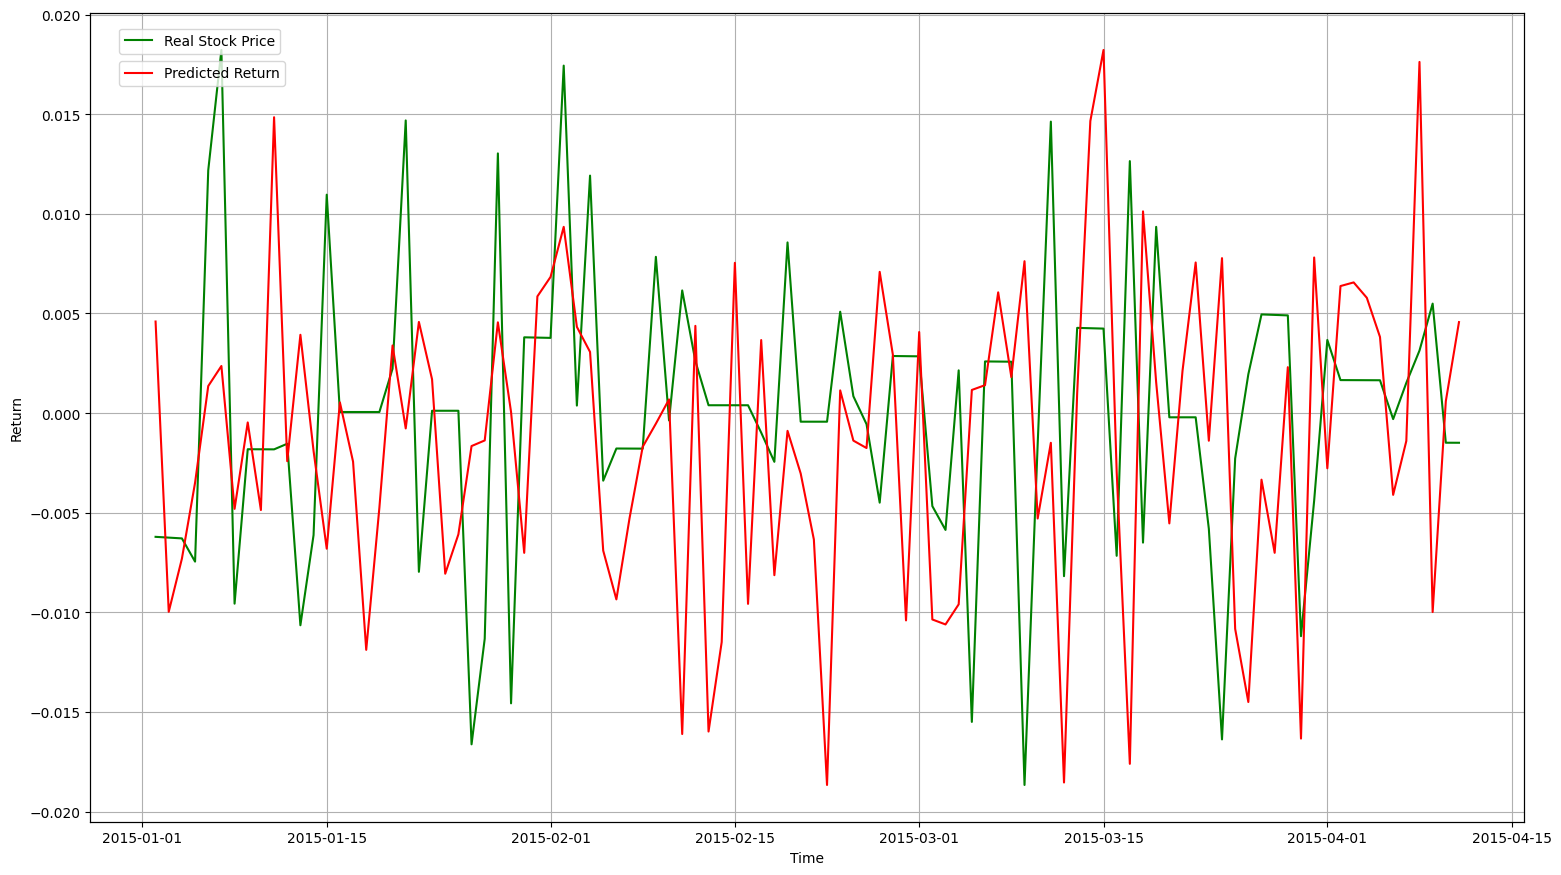

In [ ]:
##Prediction results of Microsoft using the ARMA-GARCH model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

train_data, test_data = df_stocks[0:-730], df_stocks[-730:]
returns = pd.DataFrame(np.log(train_data['close']).diff().dropna())
returns.rename(columns={'close': 'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARIMA(returns, order=(1, 0, 1)).fit()
arch_mod = arch_model(returns, vol='Garch', p=1, q=1)
res = arch_mod.fit(disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params['omega']
alpha = res.params['alpha[1]']
beta = res.params['beta[1]']


def returns_predict(period):
    returns_pool = []
    for _ in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
    return returns_pool


train_returns = pd.DataFrame(np.log(test_data['close']).diff().dropna())
train_returns.rename(columns={'close': 'Log Return Rate'}, inplace=True)

plt.figure(figsize=(14, 8))
fig, ax = plt.subplots(figsize=(18.5, 10.5))

ax.plot(df_stocks.index[-730:-630], train_returns['Log Return Rate'][:100], color='green', label='Real Stock Price')

ax2 = ax.twinx()
ax2.plot(df_stocks.index[-730:-630], returns_predict(100), color='red', label='Predicted Return')

ax.legend(loc=(0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])
ax2.legend(loc=(0.02, 0.91))

plt.show()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.36e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<Figure size 1400x800 with 0 Axes>

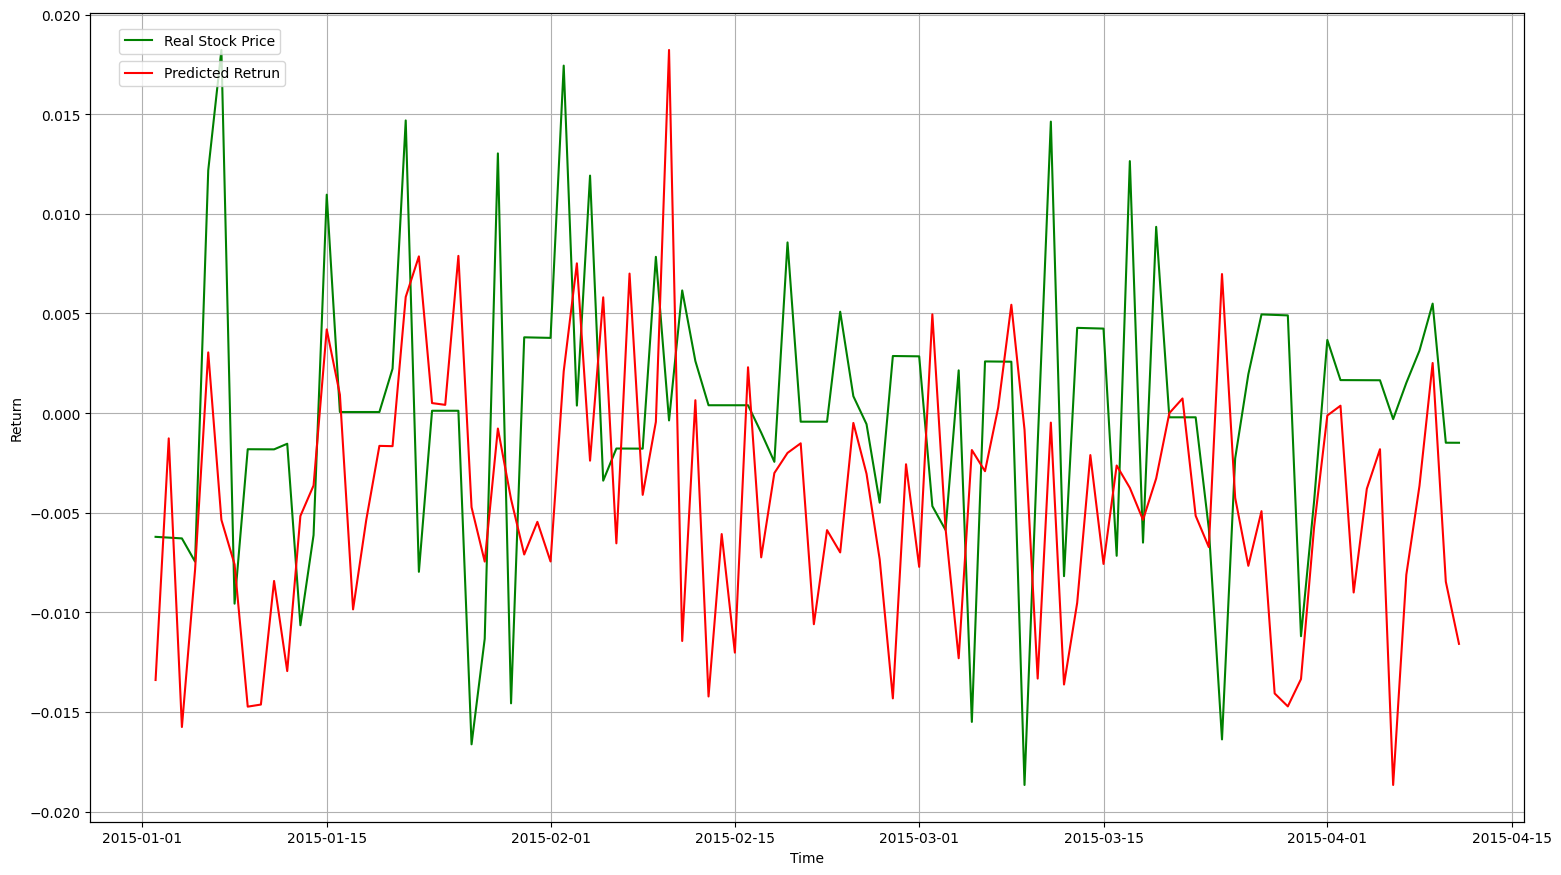

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

train_data, test_data = df_stocks[0:-730], df_stocks[-730:]
returns = pd.DataFrame(np.log(train_data['close']).diff().dropna())
returns.rename(columns={'close':'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARIMA(returns, order=(1, 0, 1)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]
def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool
train_returns = pd.DataFrame(np.log(test_data['close']).diff().dropna())
train_returns.rename(columns={'close':'Log Return Rate'}, inplace=True)
plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
ax.plot(df_stocks.index[-730:-630], train_returns['Log Return Rate'][:100], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(df_stocks.index[-730:-630],returns_predict(100), color='red',label = 'Predicted Retrun')
ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])
ax2.legend(loc = (0.02, 0.91))

## Convert adj close price into integer format

In [ ]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [ ]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [ ]:
df_stocks.head()

prices                                           articles
2007-01-01   12469  . What Sticks from '06. Somalia Orders Islamis...
2007-01-02   12472  . Heart Health: Vitamin Does Not Prevent Death...
2007-01-03   12474  . Google Answer to Filling Jobs Is an Algorith...
2007-01-04   12480  . Helping Make the Shift From Combat to Commer...
2007-01-05   12398  . Rise in Ethanol Raises Concerns About Corn a...

## Remove letfmost dots from news article headlines

In [ ]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

In [ ]:
df_stocks.head()

prices                                           articles
2007-01-01   12469   What Sticks from '06. Somalia Orders Islamist...
2007-01-02   12472   Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03   12474   Google Answer to Filling Jobs Is an Algorithm...
2007-01-04   12480   Helping Make the Shift From Combat to Commerc...
2007-01-05   12398   Rise in Ethanol Raises Concerns About Corn as...

## Sentiment analysis

In [ ]:
df = df_stocks[['prices']].copy()
df.head()

prices
2007-01-01   12469
2007-01-02   12472
2007-01-03   12474
2007-01-04   12480
2007-01-05   12398

In [ ]:
df = df_stocks[['prices']].copy()

In [ ]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [ ]:
df.head()

prices compound neg neu pos
2007-01-01   12469                     
2007-01-02   12472                     
2007-01-03   12474                     
2007-01-04   12480                     
2007-01-05   12398

## Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import unicodedata
import pandas as pd

# 假设df_stocks是你的原始DataFrame，且已经确保索引是日期类型
# df用于保存结果，确保已经初始化并且有相应的列：compound, neg, neu, pos

sid = SentimentIntensityAnalyzer()

# 确认df_stocks的索引是日期类型
if pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df_stocks.index):
    for date, row in df_stocks.iterrows():
        try:
            # 直接将unicode文本转化为兼容ASCII的字符串，避免编码错误
            sentence = unicodedata.normalize('NFKD', row['articles']).encode('ascii', 'ignore').decode('ascii')
            ss = sid.polarity_scores(sentence)

            # 使用.loc[]方法更新DataFrame
            df.loc[date, 'compound'] = ss['compound']
            df.loc[date, 'neg'] = ss['neg']
            df.loc[date, 'neu'] = ss['neu']
            df.loc[date, 'pos'] = ss['pos']
        except TypeError as e:
            print("发生类型错误：", e)
            print("在处理日期：", date)
            print("原始文章内容：", row['articles'])
else:
    print("df_stocks的索引不是日期类型，请检查数据。")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df.head()

prices compound    neg    neu    pos
2007-01-01   12469  -0.9814  0.159  0.749  0.093
2007-01-02   12472  -0.8871  0.118  0.783  0.099
2007-01-03   12474  -0.9993  0.198  0.734  0.067
2007-01-04   12480  -0.9982  0.131  0.806  0.062
2007-01-05   12398  -0.9901  0.124  0.794  0.082

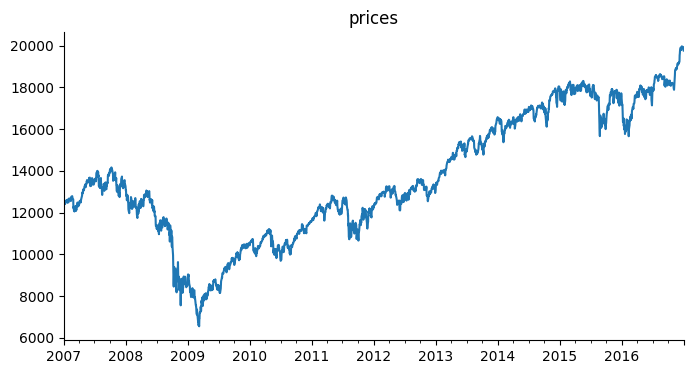

In [ ]:
# @title prices

from matplotlib import pyplot as plt
df['prices'].plot(kind='line', figsize=(8, 4), title='prices')
plt.gca().spines[['top', 'right']].set_visible(False)

## Train base line model

### Split training and testing data

In [ ]:
train_start_date = '2007-01-01'
train_end_date = '2015-12-31'
test_start_date = '2016-01-01'
test_end_date = '2016-12-31'
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]

### Split prediction labels for training and testing dataset

In [ ]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])


NameError: name 'pd' is not defined

In [ ]:
y_train.head()

prices
2007-01-01   12469
2007-01-02   12472
2007-01-03   12474
2007-01-04   12480
2007-01-05   12398

### Convert sentiment analysis score into numpy array

In [ ]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],
                                  #df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

<ipython-input-123-decd2f52c09f>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():


In [ ]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],
                                    #df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

<ipython-input-124-06149dd47e7a>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in test.T.iteritems():


In [ ]:
pip install treeinterpreter

In [ ]:
numpy_df_train

array([[0.159, 0.093],
       [0.118, 0.099],
       [0.198, 0.067],
       ...,
       [0.174, 0.083],
       [0.166, 0.14 ],
       [0.206, 0.133]])

In [ ]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

<ipython-input-127-fcb622bd595d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(numpy_df_train, y_train)


RandomForestRegressor()

In [ ]:
print(rf.feature_importances_)

[0.54158578 0.45841422]


In [ ]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)
#print prediction
#print contributions

In [ ]:
rf.score(numpy_df_test,y_test)

-42.85887862449329

In [ ]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [ ]:
predictions_df.head()

prices
2015-01-01  10938.400000
2015-01-02  10779.587500
2015-01-03  13952.361889
2015-01-04  12562.793333
2015-01-05  12083.668333

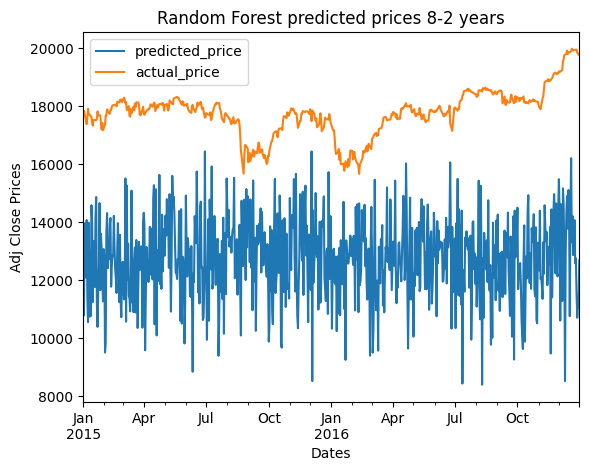

In [ ]:
ax = predictions_df.rename(columns=
                           {"prices": "predicted_price"}).plot(title=
                           'Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Adj Close Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()


# colors = ['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499']

## Alignment of the testing dataset price value and pridicted values

In [ ]:
from datetime import datetime, timedelta
temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days

print(average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print(average_upcoming_5_days_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print(difference_test_predicted_prices)

17679.9
12107.805505555556
5572.094494444445


In [ ]:
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df.head()

prices
2015-01-01  16510.494494
2015-01-02  16351.681994
2015-01-03  19524.456383
2015-01-04  18134.887828
2015-01-05  17655.762828

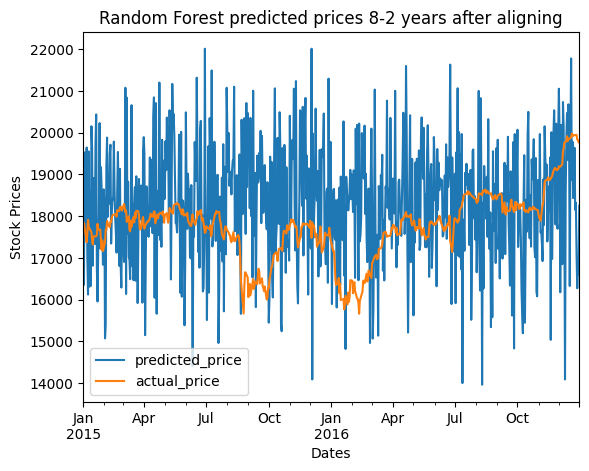

In [ ]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()


## Smoothing based approach

### Applying EWMA pandas to smooth the stock prices

In [ ]:
predictions_df['ewma'] = predictions_df["prices"].ewm(span=60).mean()

In [ ]:
predictions_df.head()

prices          ewma
2015-01-01  16510.494494  16510.494494
2015-01-02  16351.681994  16429.764807
2015-01-03  19524.456383  17495.901957
2015-01-04  18134.887828  17663.722993
2015-01-05  17655.762828  17662.023086

In [ ]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = predictions_df["actual_value"].ewm(span=60).mean()

In [ ]:
predictions_df.head()

prices          ewma  actual_value  actual_value_ewma
2015-01-01  16510.494494  16510.494494         17828       17828.000000
2015-01-02  16351.681994  16429.764807         17832       17830.033333
2015-01-03  19524.456383  17495.901957         17722       17792.815295
2015-01-04  18134.887828  17663.722993         17612       17745.326592
2015-01-05  17655.762828  17662.023086         17501       17693.150223

In [ ]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

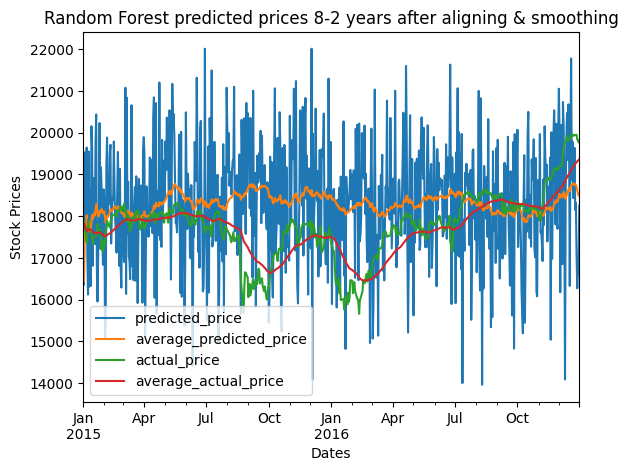

In [ ]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()


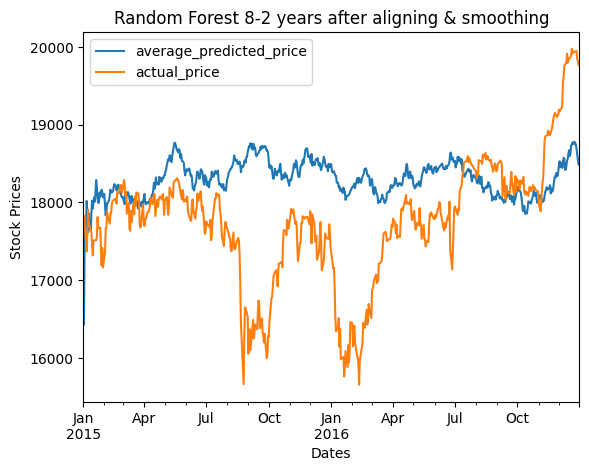

In [ ]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()


## Logistic Regression approach

### Step 1 - Function for alignment so we can use it for later on iteration

In [ ]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

## Actual implemetation of Logistic regression

In [ ]:
pip install treeinterpreter

<ipython-input-43-fbd56982699f>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():
<ipython-input-43-fbd56982699f>:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in test.T.iteritems():
<ipython-input-43-fbd56982699f>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():
<ipython-input-43-fbd56982699f>:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in test.T.iteritems():
<ipython-input-43-fbd56982699f>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():
<ipython-input-43-fbd56982699f>:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .i

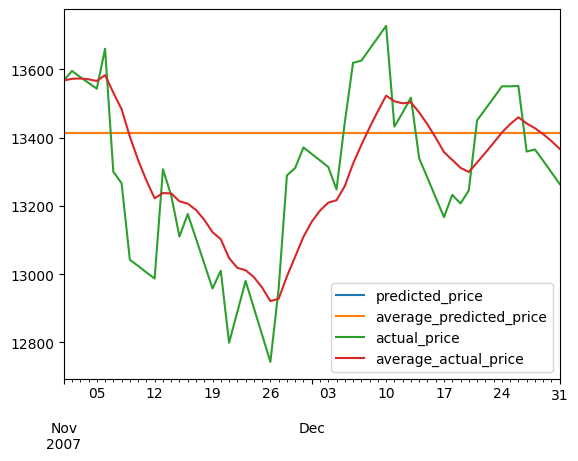

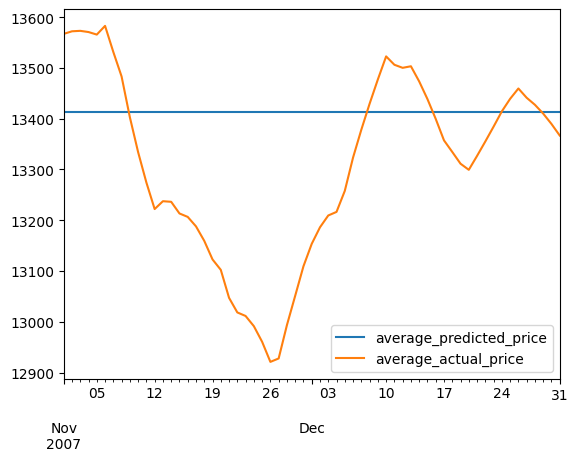

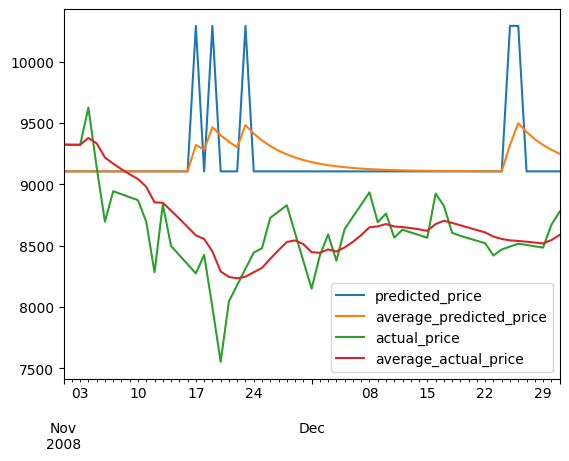

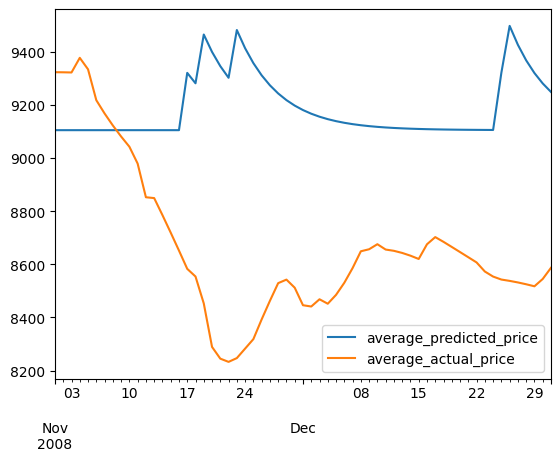

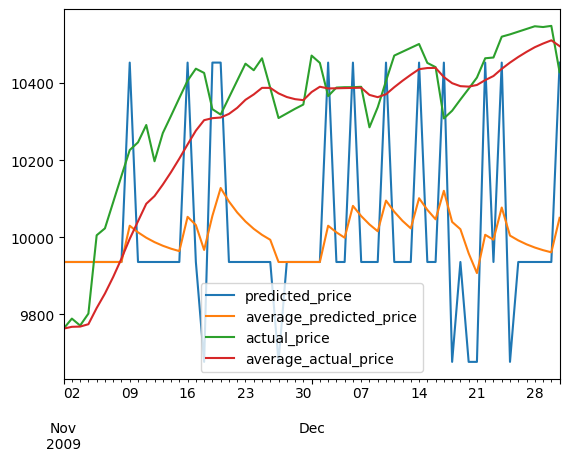

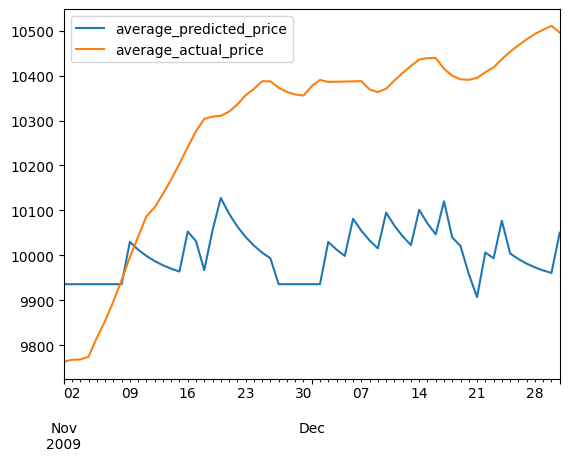

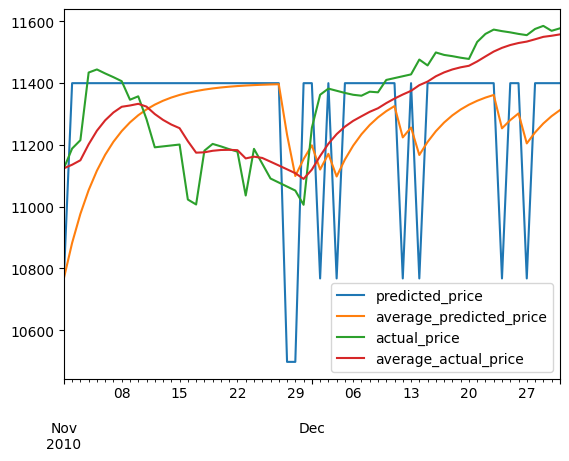

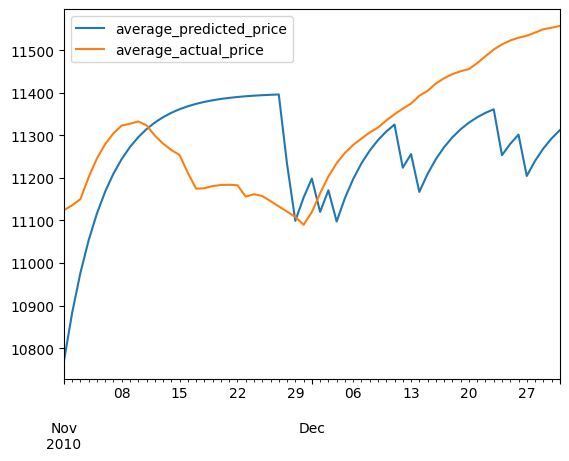

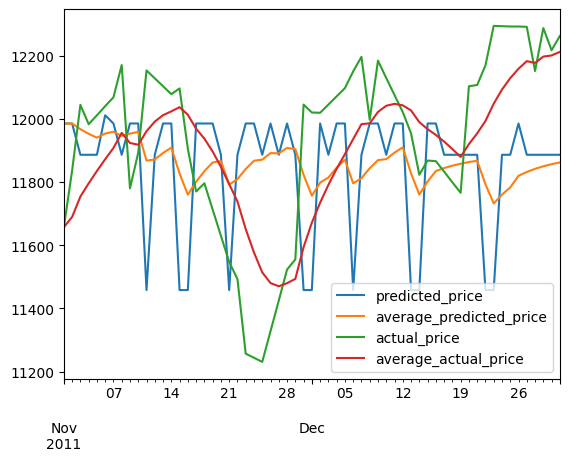

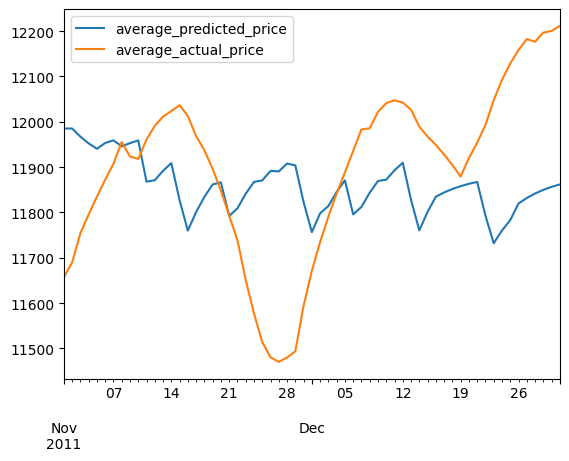

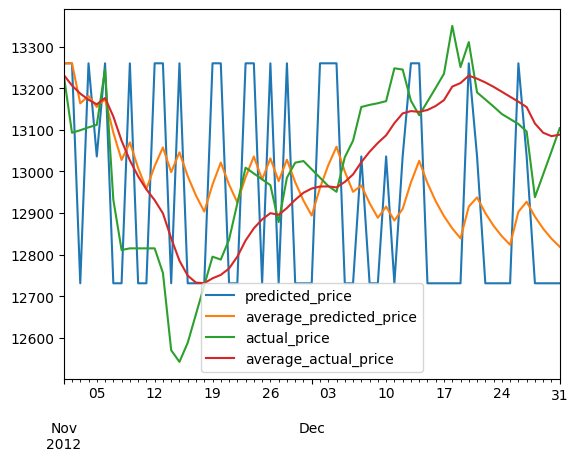

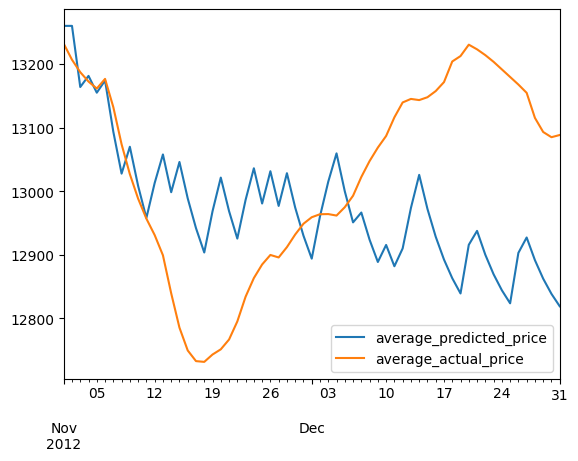

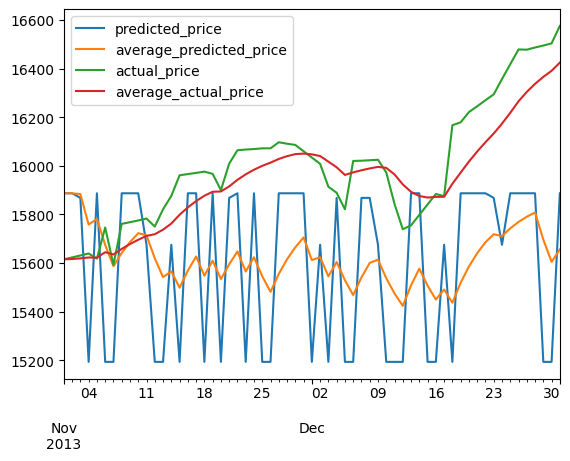

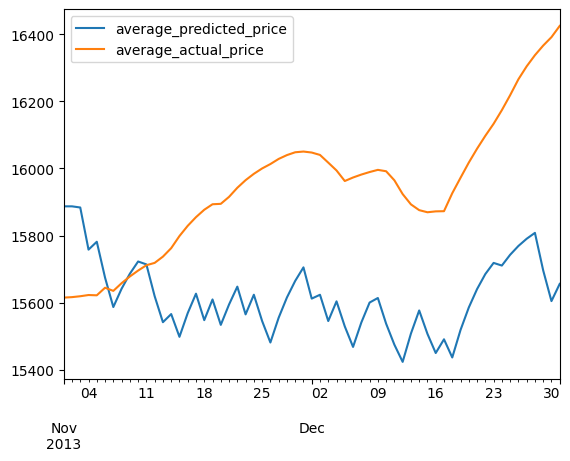

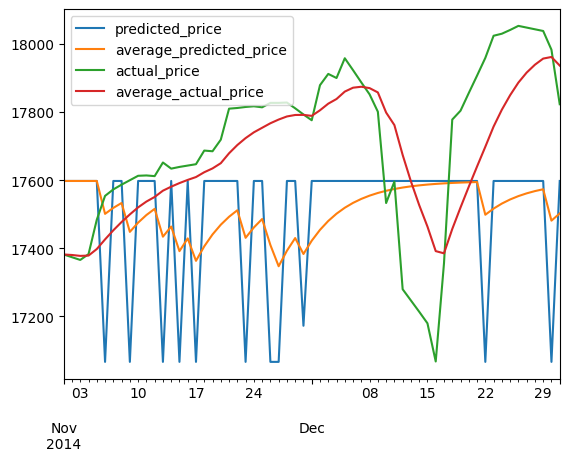

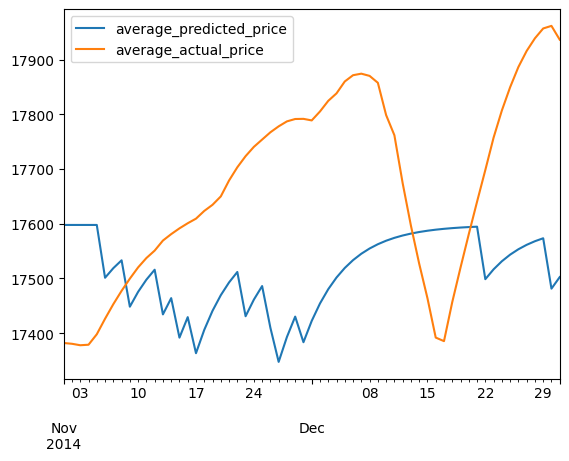

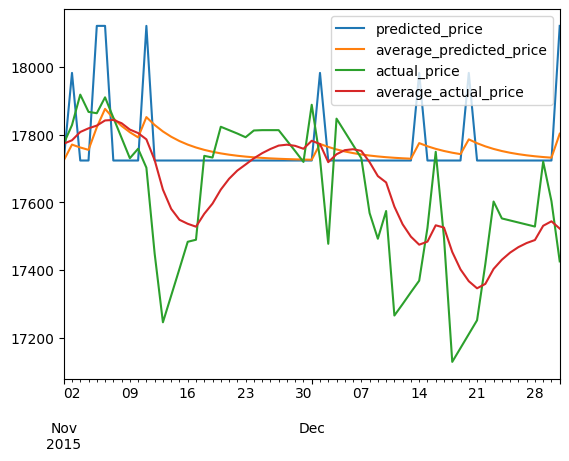

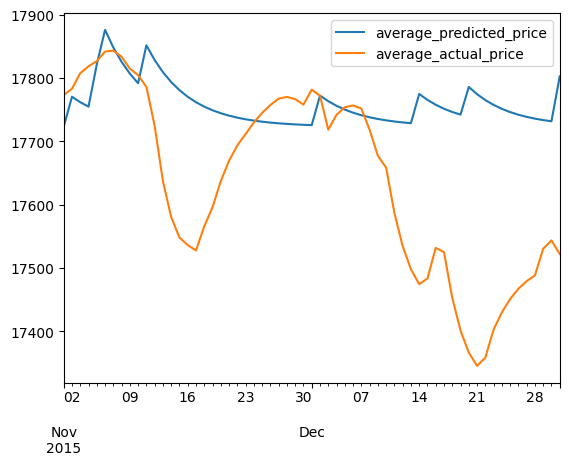

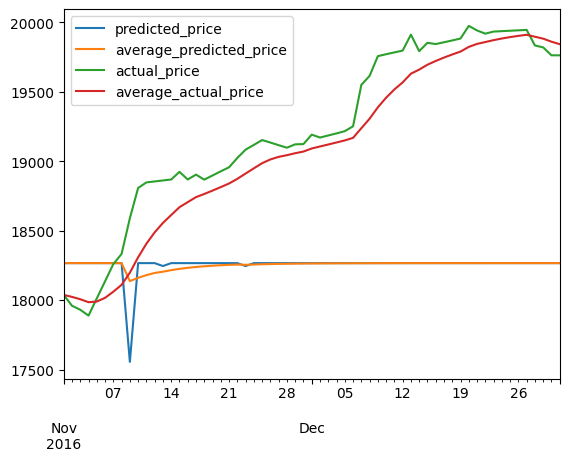

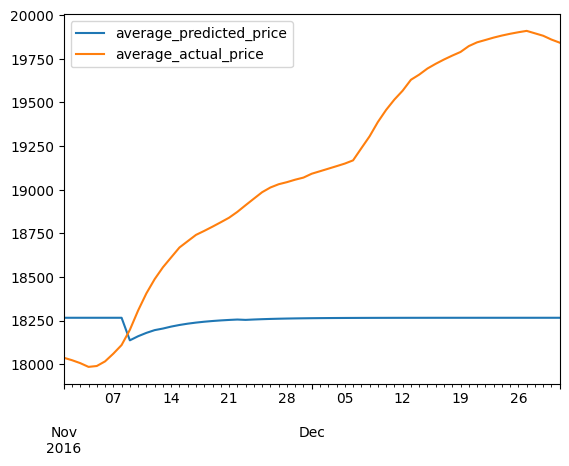

In [ ]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]

    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)

    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])

    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)

    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=10, adjust=False).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=10, adjust=False).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    #print lr.score(numpy_df_test,test['prices'])
    #print lr.score(numpy_df_train, train['prices'])
#     predictions_df_list.show()

In [ ]:
lr.classes_

array([15660, 15766, 15882, 15885, 15914, 15944, 15954, 15973, 15988,
       15995, 16002, 16009, 16014, 16016, 16024, 16027, 16029, 16069,
       16085, 16086, 16093, 16140, 16145, 16151, 16153, 16167, 16196,
       16204, 16336, 16346, 16363, 16379, 16381, 16391, 16398, 16413,
       16416, 16431, 16449, 16453, 16454, 16460, 16466, 16468, 16484,
       16514, 16516, 16544, 16557, 16598, 16620, 16639, 16697, 16865,
       16899, 16906, 16943, 16964, 16995, 17000, 17006, 17029, 17051,
       17073, 17140, 17148, 17158, 17213, 17217, 17218, 17223, 17227,
       17229, 17251, 17286, 17313, 17325, 17356, 17400, 17409, 17435,
       17481, 17492, 17495, 17498, 17500, 17502, 17515, 17520, 17525,
       17526, 17529, 17530, 17535, 17541, 17556, 17563, 17570, 17576,
       17582, 17593, 17602, 17603, 17609, 17616, 17623, 17633, 17640,
       17651, 17652, 17660, 17674, 17675, 17685, 17694, 17705, 17706,
       17710, 17711, 17716, 17717, 17718, 17720, 17721, 17729, 17732,
       17733, 17737,

In [ ]:
lr.coef_[0]

array([-0.11363251,  0.02466557, -0.00451248, -0.02026741])

## Random Forest with Alignment and Smoothing

<ipython-input-46-bd02d31d0ae2>:30: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():
<ipython-input-46-bd02d31d0ae2>:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in test.T.iteritems():
<ipython-input-46-bd02d31d0ae2>:30: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():
<ipython-input-46-bd02d31d0ae2>:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in test.T.iteritems():
<ipython-input-46-bd02d31d0ae2>:30: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():
<ipython-input-46-bd02d31d0ae2>:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .i

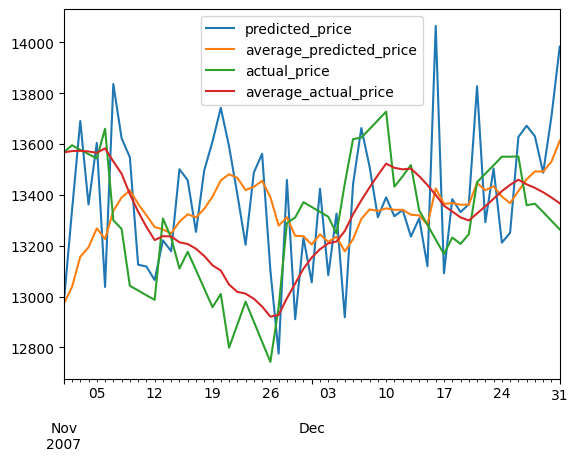

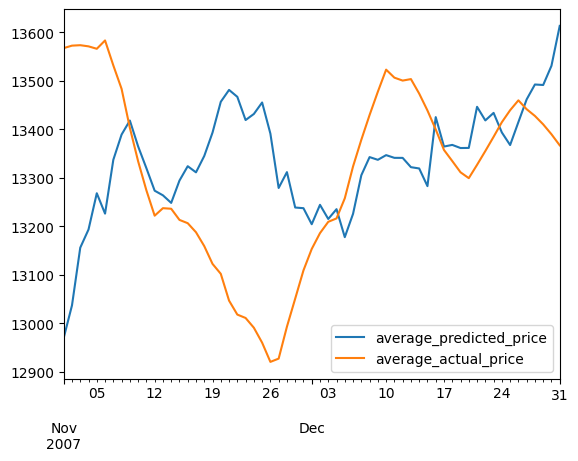

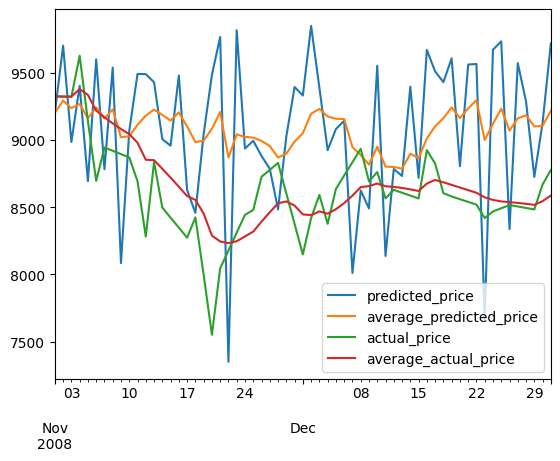

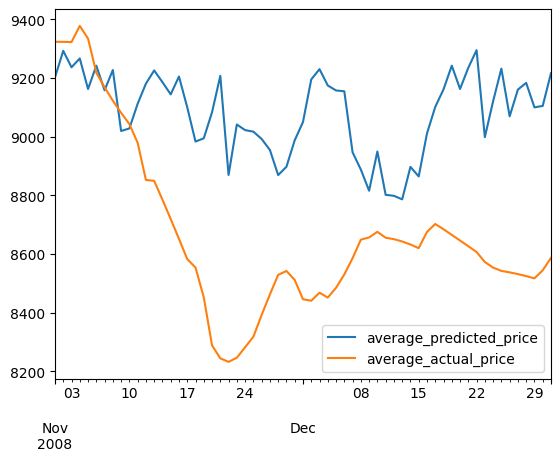

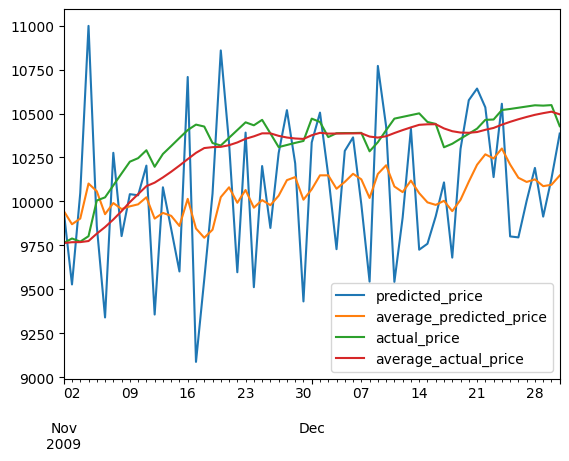

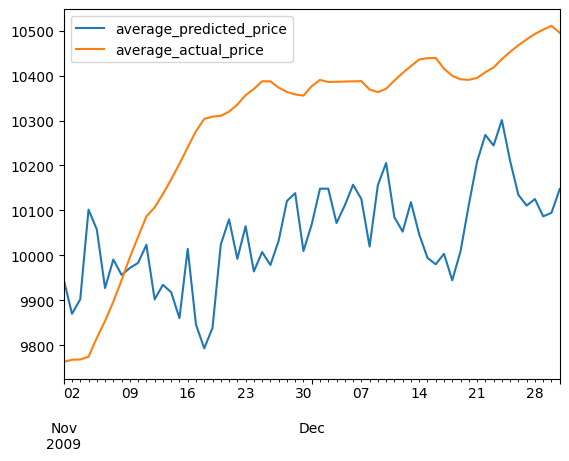

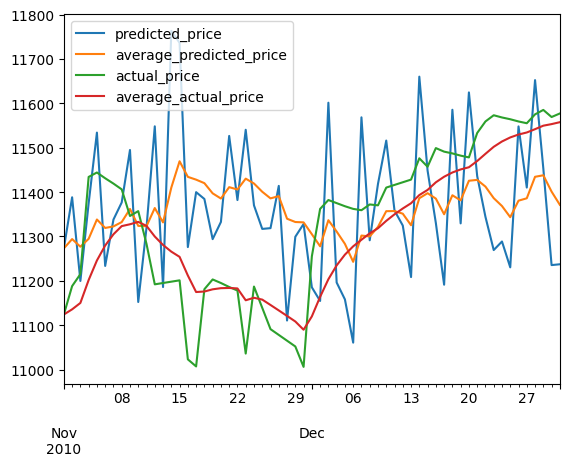

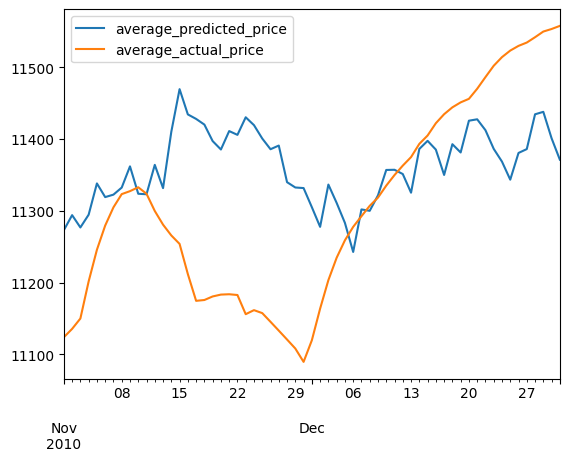

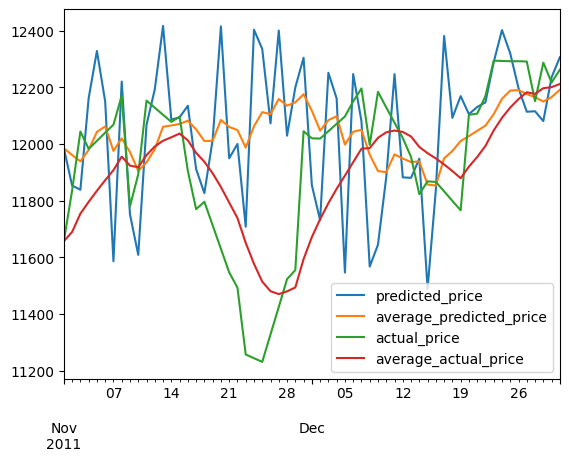

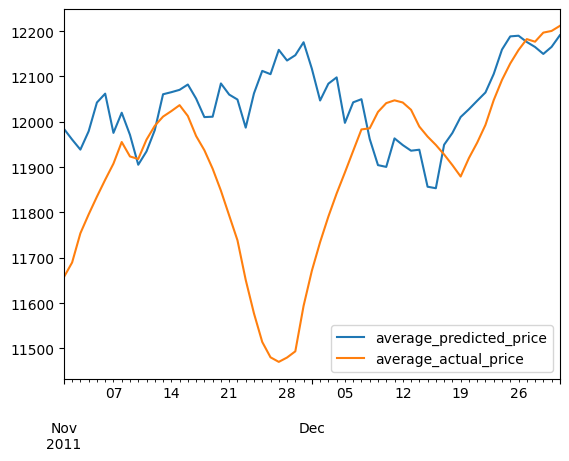

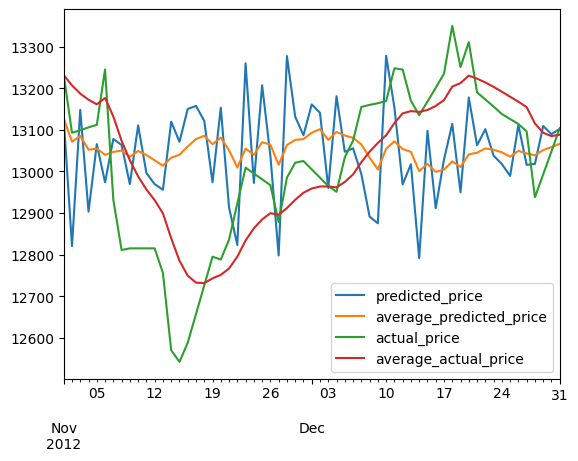

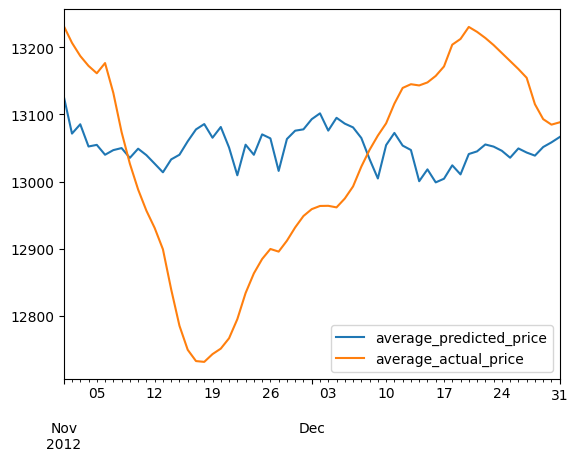

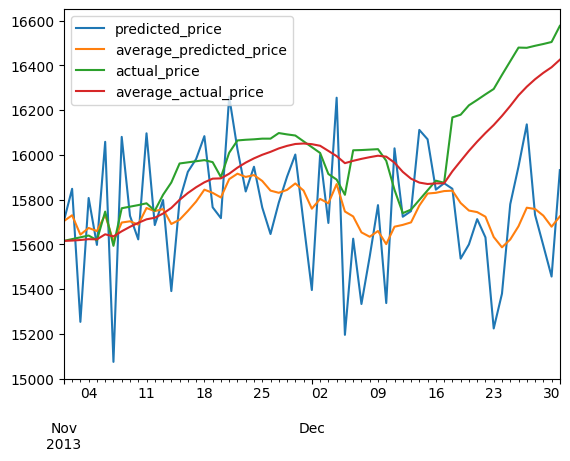

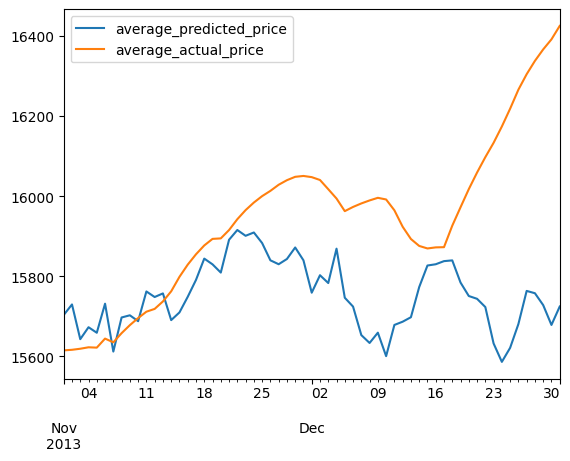

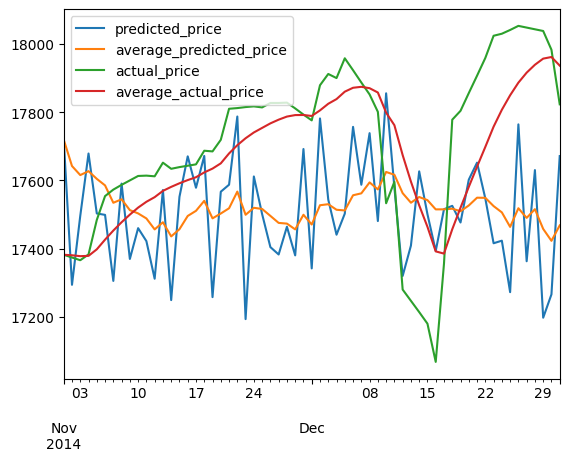

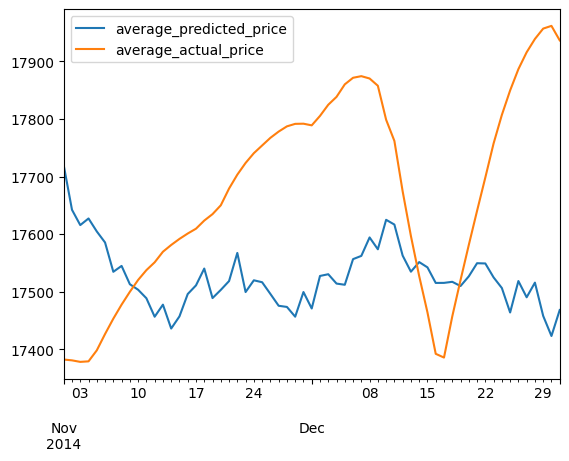

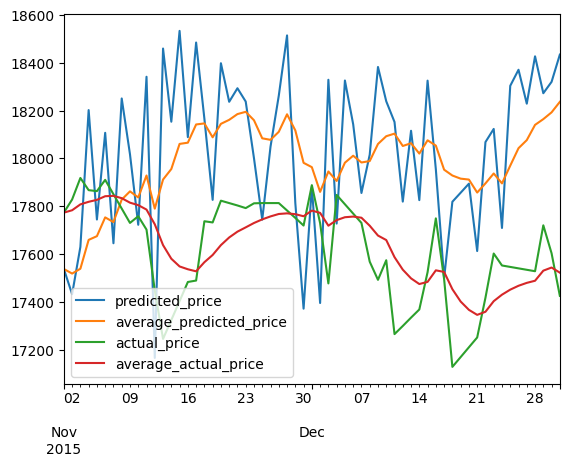

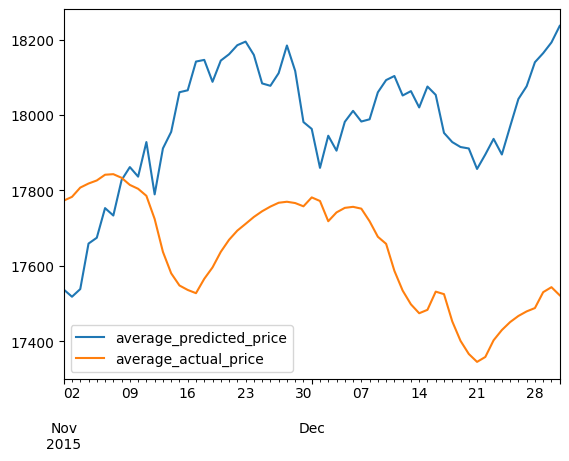

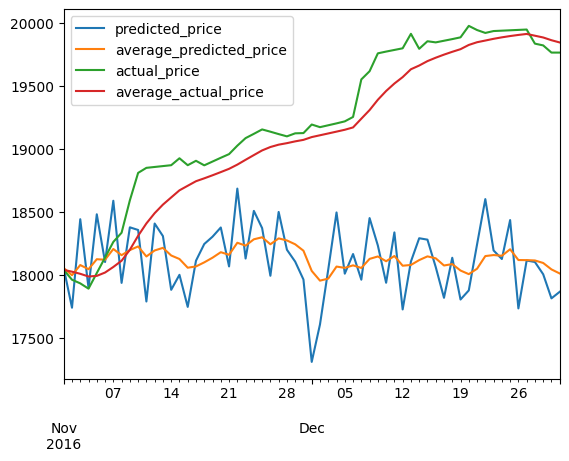

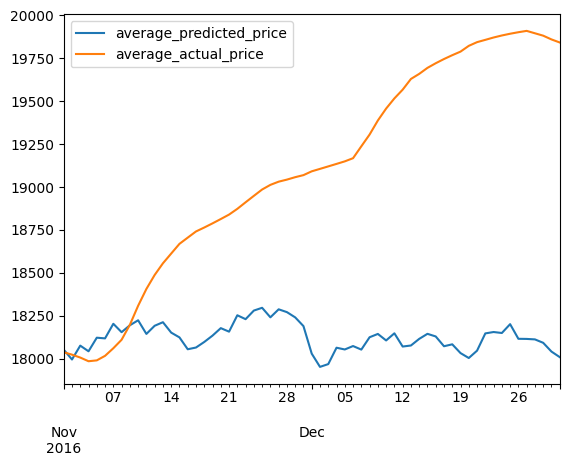

In [ ]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')

# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]

    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)

    # Generating models
    rf = RandomForestRegressor()
    rf.fit(numpy_df_train, train['prices'])

    #print rf

    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=10, adjust=False).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=10, adjust=False).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()

#     predictions_df_list.show()

## Multi Layer Perceptron

<ipython-input-47-3bf350faa347>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():
<ipython-input-47-3bf350faa347>:33: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in test.T.iteritems():
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-47-3bf350faa347>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():
<ipython-input-47-3bf350faa347>:33: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in test.T.iteritems():
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multi

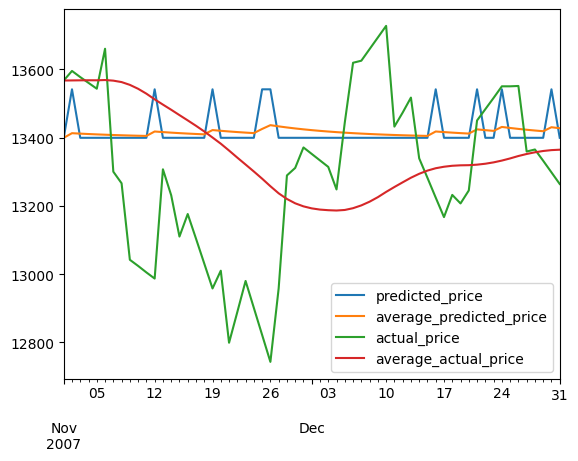

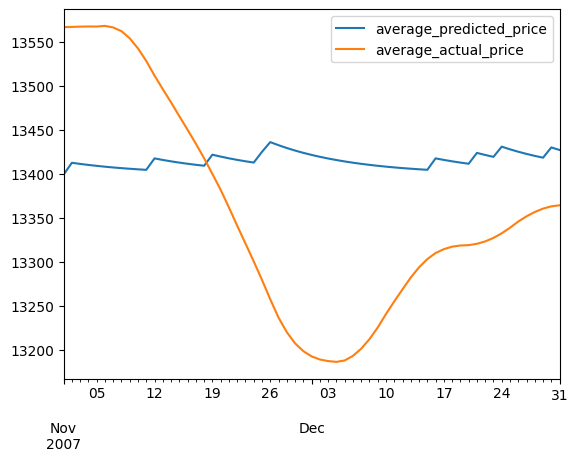

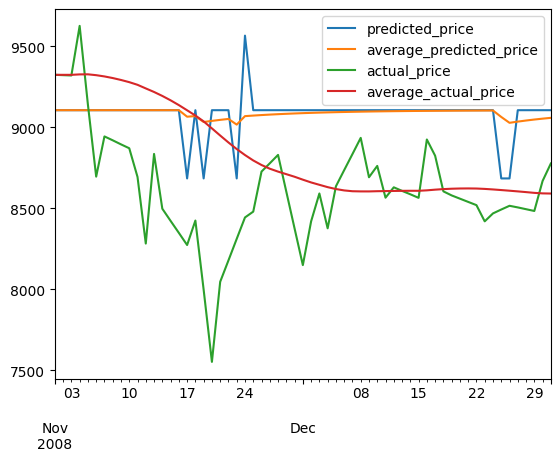

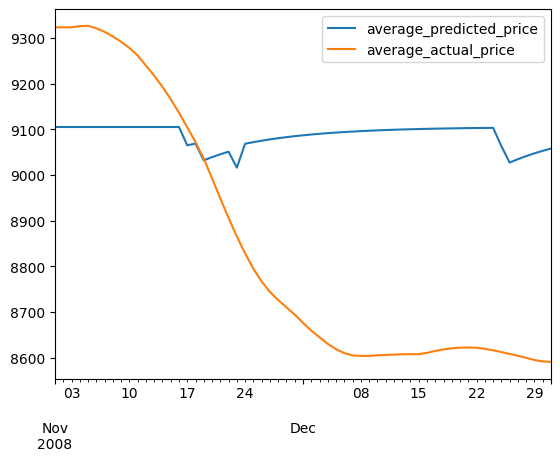

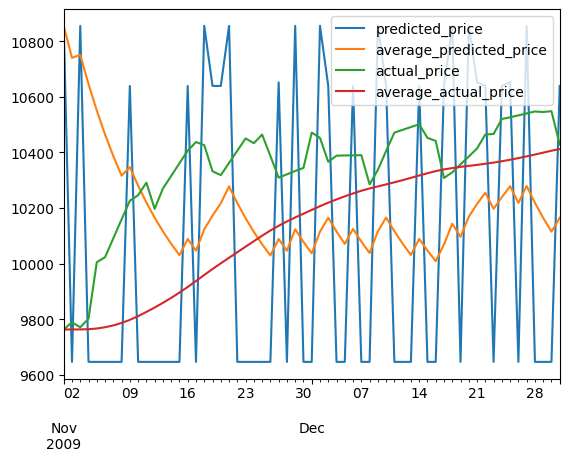

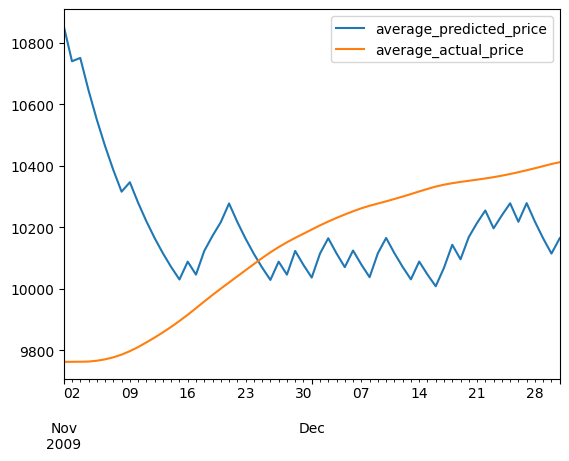

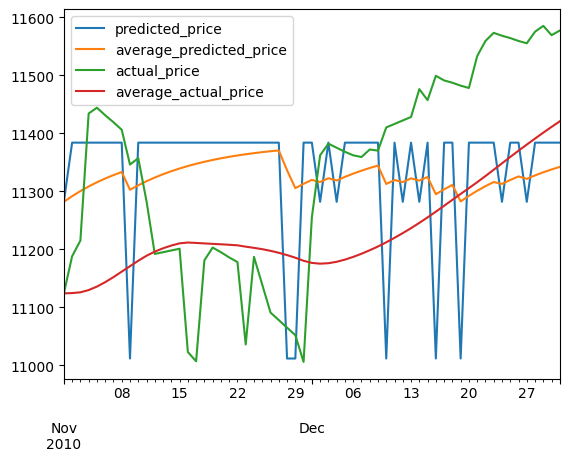

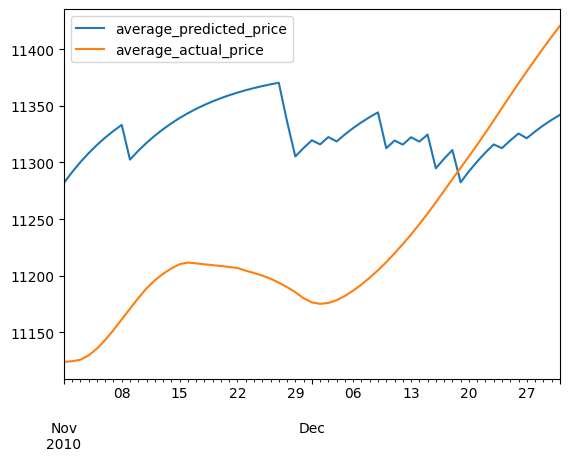

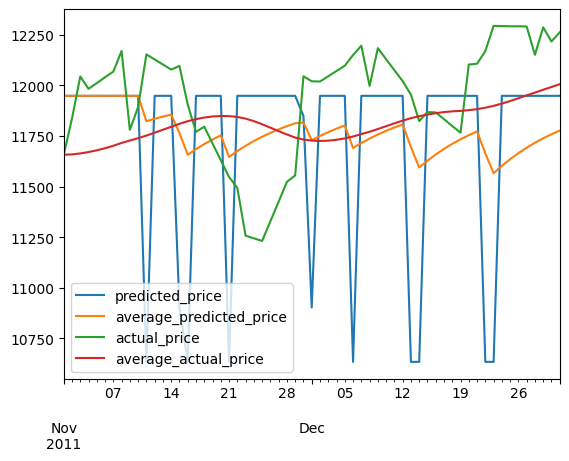

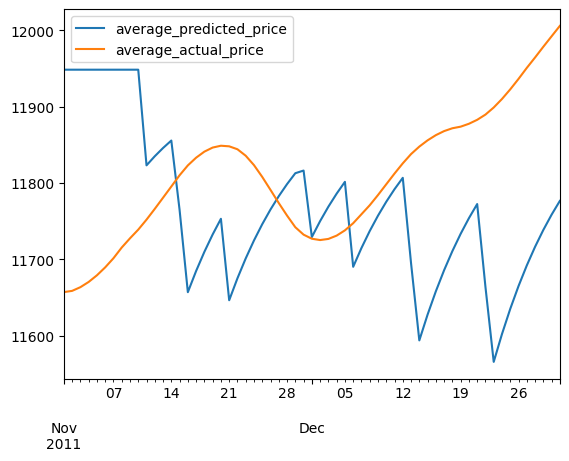

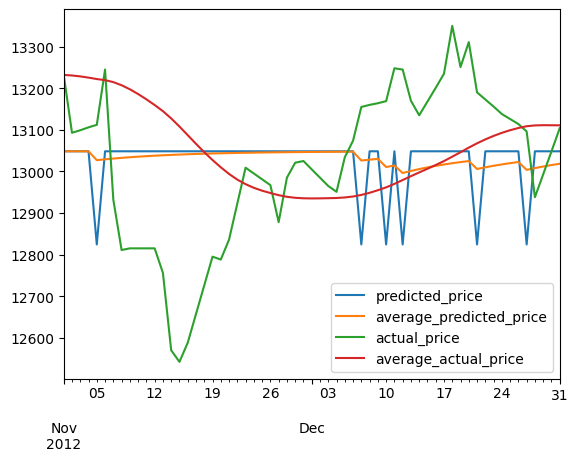

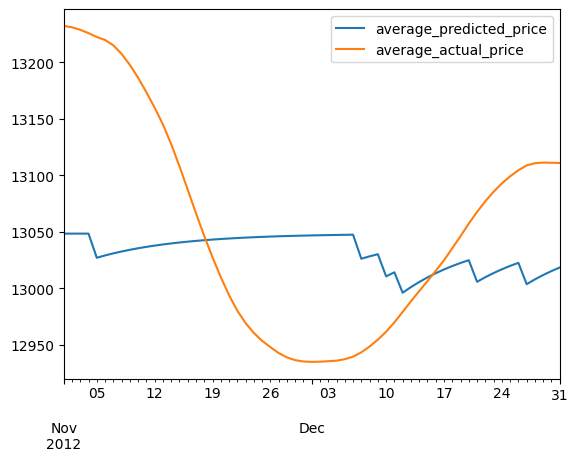

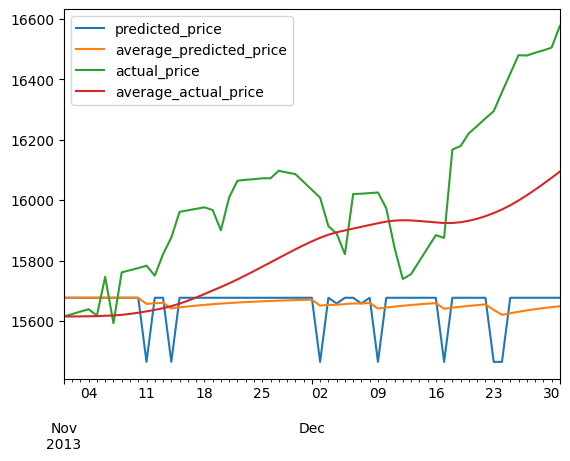

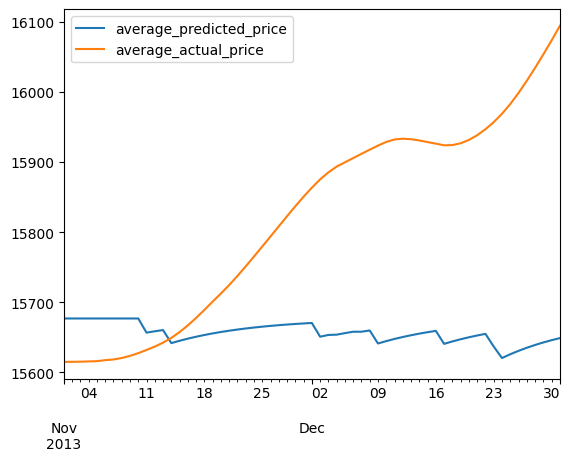

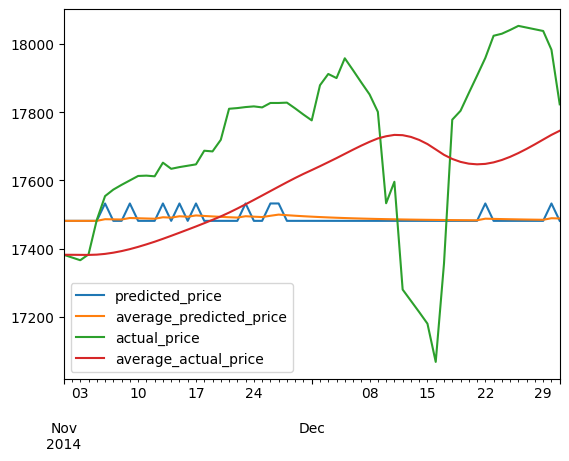

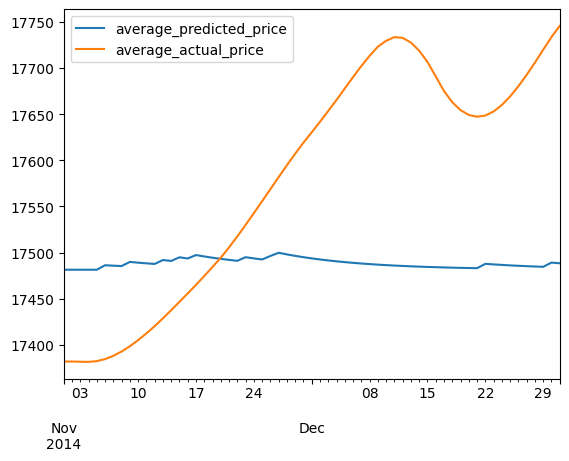

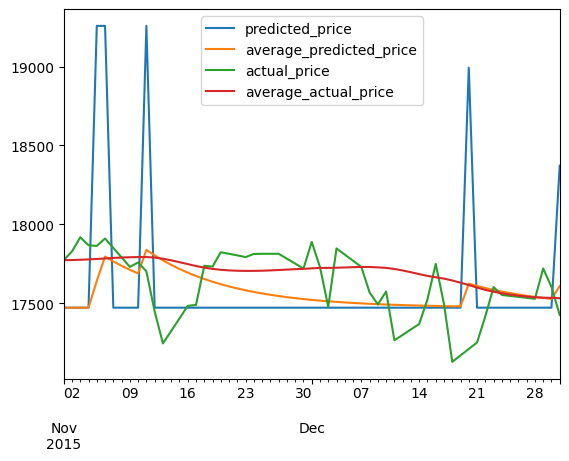

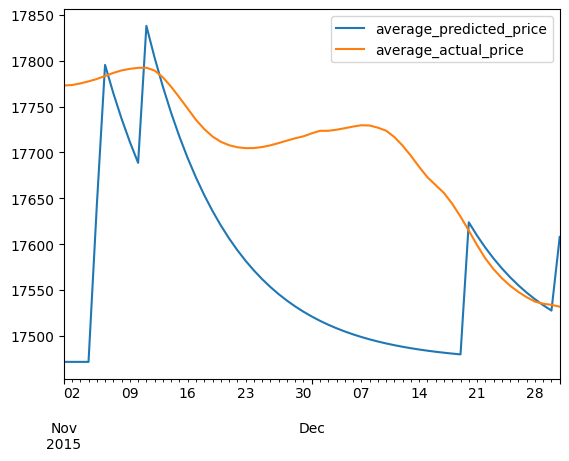

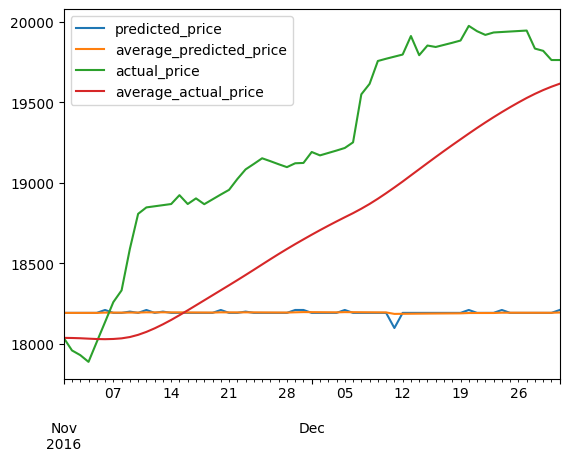

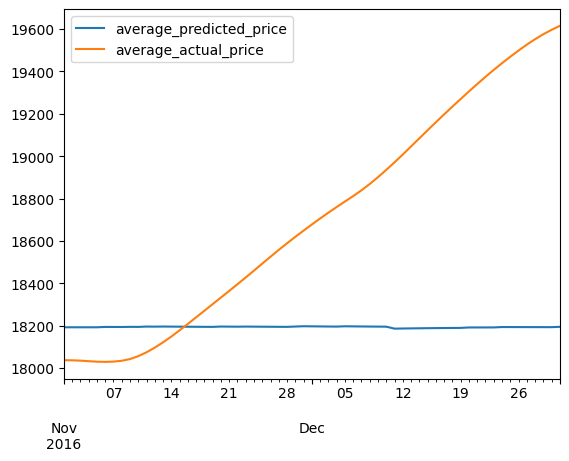

In [ ]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')

# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]

    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)

    # Generating models
    rf = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu',
                         solver='adam', alpha=0.0001, learning_rate_init = 0.0001, shuffle=False) # span = 20 # best 1
    rf.fit(numpy_df_train, train['prices'])
    prediction = rf.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=20, adjust=False).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=20, adjust=False).mean().ewm(span=20, adjust=False).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
#   predictions_df_list.show()


In [ ]:
# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot()
train['prices'].plot()

ValueError: Multilabel classification trees not supported

In [ ]:
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestClassifier  # Or any other suitable algorithm
# Create and train the RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)  # X_train contains your input features, y_train contains the corresponding labels
# Perform prediction and interpretation
prediction, bias, contributions = ti.predict(model, new_data)

<ipython-input-222-8da501cf4e76>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)  # X_train contains your input features, y_train contains the corresponding labels
